In [48]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import math

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
#from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder

In [49]:
pd.set_option('display.max_columns', None)

# Импорт данных

In [50]:
df_domclick = pd.read_csv("domclick/Нижний Новгород_domclick_dataset.csv", sep = ";")
df_domclick.info()
df_domclick.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2715 entries, 0 to 2714
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             2715 non-null   int64  
 1   region                         2715 non-null   object 
 2   address                        2715 non-null   object 
 3   latitude                       2715 non-null   float64
 4   longitude                      2715 non-null   float64
 5   price                          2715 non-null   int64  
 6   house_floors                   2715 non-null   int64  
 7   house_buildYear                2715 non-null   object 
 8   house_ceilingHeight            2715 non-null   object 
 9   house_hasGarbageDisposer       1958 non-null   object 
 10  house_liftsFreight             948 non-null    float64
 11  house_liftsPassenger           1721 non-null   float64
 12  house_wallType                 2692 non-null   o

,id,region,address,latitude,longitude,price,house_floors,house_buildYear,house_ceilingHeight,house_hasGarbageDisposer,house_liftsFreight,house_liftsPassenger,house_wallType,house_areaCommonPropery,house_areaNonResidential,house_areaResidential,house_basementArea,house_chuteCount,house_coldWaterType,house_electricalEntriesCount,house_electricalType,house_elevatorsCount,house_energyEfficiency,house_entranceCount,house_fireFightingType,house_floorType,house_foundationType,house_heatingType,house_parkingSquare,house_sewerageCesspoolsVolume,house_sewerageType,house_ventilationType,saleType,objectInfo_rooms,objectInfo_area,objectInfo_kitchenArea,objectInfo_livingArea,objectInfo_floor,objectInfo_connectedBathrooms,objectInfo_separatedBathrooms,objectInfo_balconies,objectInfo_hasGas,objectInfo_renovation,objectInfo_loggias
0,1851382157,Нижний Новгород,"Южный бульвар, 10",56.217911,43.862337,5799000,17,2014,undefined,False,1.0,2.0,Панельный,2984.7,0,7026.2,576.2,NaN,Центральное,2,Центральное,2,B+,1,Автоматическая,Железобетонный,Свайный,Центральное,648.2,0,Центральное,Приточно-вытяжная,Свободная продажа,2,39.6,0.0,0.0,13,1,0,1,False,Косметический,NaN
1,1897405188,Нижний Новгород,"Мончегорская улица, 18к1",56.232263,43.821796,4400000,9,1984,undefined,True,NaN,0.0,Кирпичный,1028.9,52.4,9471.7,1179.6,5,Центральное,2,Центральное,5,Не присвоен,5,Пожарные гидранты,Железобетонный,Ленточный,Центральное,0,0,Центральное,Приточно-вытяжная,Альтернатива,1,34.5,8.0,18.7,5,undefined,1,0,True,undefined,NaN
2,1835491834,Нижний Новгород,"улица Белинского, 66",56.312430,44.004064,13900000,18,2023,2.7,NaN,1.0,1.0,Монолитно-кирпичный,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Железобетонный,NaN,NaN,NaN,NaN,NaN,NaN,Свободная продажа,2,70.3,10.4,43.0,3,0,1,0,NaN,Без ремонта,NaN
3,1652175195,Нижний Новгород,"Деловая улица, 24",56.305299,44.077681,10100000,9,2001,2.8,NaN,0.0,1.0,Монолитный,1138,248,5672.9,538.4,NaN,Центральное,2,Центральное,2,Не присвоен,2,NaN,Железобетонный,Сплошной,Центральное,NaN,NaN,Центральное,NaN,Свободная продажа,2,75.0,10.7,39.0,9,0,1,1,True,Евро,NaN
4,1889288498,Нижний Новгород,"Гаражный переулок, 5к1",56.309369,44.032765,16500000,10,2014,3,NaN,1.0,NaN,Кирпичный,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Свободная продажа,3,97.7,17.1,50.3,4,0,1,2,False,Евро,NaN


In [51]:
df_cian = pd.read_csv("cian/data_home_Novgorod.csv")
df_cian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9223 entries, 0 to 9222
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 9223 non-null   object 
 1   price                9223 non-null   int64  
 2   price_for_metr       9223 non-null   int64  
 3   floor_object         9223 non-null   int64  
 4   total_floors         9223 non-null   int64  
 5   type_of_home         9223 non-null   object 
 6   square_home          9223 non-null   float64
 7   live_square          9223 non-null   object 
 8   kitchen_square       9223 non-null   object 
 9   height_ceiling       9223 non-null   object 
 10  bathroom             9223 non-null   object 
 11  balcony              9223 non-null   object 
 12  repair               9223 non-null   object 
 13  yer_home             9223 non-null   object 
 14  garbage_chute        9223 non-null   object 
 15  type_home            9223 non-null   o

In [52]:
df_cian.head()

,name,price,price_for_metr,floor_object,total_floors,type_of_home,square_home,live_square,kitchen_square,height_ceiling,bathroom,balcony,repair,yer_home,garbage_chute,type_home,type_of_overlap,entrances,heating,accident_rate,gas_supply,finishing,number_of_elevators,address,link
0,310/1106 квартиры,1300000,16456,3,3,Вторичка,79.0,Null,8.0,2.9,1,1,Косметический,1952,Null,Блочный,Деревянные,3,Центральное,Нет,Центральное,Null,Null,"Нижегородская область, Нижний Новгород, р-н Ле...",https://nn.cian.ru/sale/flat/288428796/
1,1/2 квартиры,1300000,23297,3,4,Вторичка,55.8,42.0,5.2,Null,1,1,Без ремонта,1963,Null,Кирпичный,Железобетонные,3,Центральное,Нет,Центральное,Null,Null,"Нижегородская область, Нижний Новгород, р-н Ка...",https://nn.cian.ru/sale/flat/283385856/
2,1/2 квартиры,1150000,22682,1,2,Вторичка,50.7,Null,Null,Null,1,Null,Без ремонта,1959,Null,Блочный,Деревянные,1,Центральное,Нет,Центральное,Null,Null,"Нижегородская область, Нижний Новгород, р-н Ле...",https://nn.cian.ru/sale/flat/292147045/
3,1-комн. квартира,1500000,96774,-2,25,Новостройка,15.5,Null,Null,2.7,Null,Null,Null,Null,Null,Монолитно-кирпичный,Null,Null,Null,Null,Null,Неизвестно,Null,"Нижегородская область, Нижний Новгород, р-н Ка...",https://nn.cian.ru/sale/flat/294499347/
4,1-комн. квартира,1500000,48387,2,2,Вторичка,31.0,16.0,10.0,Null,1,Null,Косметический,Null,Null,Null,Null,Null,Null,Null,Null,Null,Null,"Нижегородская область, Нижний Новгород, р-н Со...",https://nn.cian.ru/sale/flat/291582966/


# Подготовка данных

In [53]:
df_domclick = df_domclick.replace('undefined', np.nan)
df_domclick['objectInfo_kitchenArea'] = df_domclick['objectInfo_kitchenArea'].replace(0, np.nan)
df_domclick['objectInfo_livingArea'] = df_domclick['objectInfo_livingArea'].replace(0, np.nan)

In [54]:
df_domclick.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2715 entries, 0 to 2714
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             2715 non-null   int64  
 1   region                         2715 non-null   object 
 2   address                        2715 non-null   object 
 3   latitude                       2715 non-null   float64
 4   longitude                      2715 non-null   float64
 5   price                          2715 non-null   int64  
 6   house_floors                   2715 non-null   int64  
 7   house_buildYear                2683 non-null   object 
 8   house_ceilingHeight            760 non-null    object 
 9   house_hasGarbageDisposer       1958 non-null   object 
 10  house_liftsFreight             948 non-null    float64
 11  house_liftsPassenger           1721 non-null   float64
 12  house_wallType                 2676 non-null   o

In [55]:
df_cian = df_cian.drop_duplicates(keep = 'last')
df_cian = df_cian.replace('Null', np.nan)
df_cian = df_cian.replace('Нет информации', np.nan)
df_cian.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6287 entries, 0 to 9222
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 6287 non-null   object 
 1   price                6287 non-null   int64  
 2   price_for_metr       6287 non-null   int64  
 3   floor_object         6287 non-null   int64  
 4   total_floors         6287 non-null   int64  
 5   type_of_home         6287 non-null   object 
 6   square_home          6287 non-null   float64
 7   live_square          5208 non-null   object 
 8   kitchen_square       5384 non-null   object 
 9   height_ceiling       2734 non-null   object 
 10  bathroom             4318 non-null   object 
 11  balcony              3596 non-null   object 
 12  repair               4145 non-null   object 
 13  yer_home             4246 non-null   object 
 14  garbage_chute        1291 non-null   object 
 15  type_home            5304 non-null   object

In [56]:
df_cian['name'].unique()

array(['310/1106 квартиры', '1/2 квартиры', '1-комн. квартира',
       '2-комн. квартира', 'Апартаменты-студия', '1/3 квартиры',
       '3-комн. квартира', 'Студия', '1-комн. апартаменты',
       '2/3 квартиры', 'Многокомнатная квартира', '1/4 квартиры',
       '2-комн. апартаменты', '4-комн. квартира', '5-комн. квартира',
       'Квартира свободной планировки', '3-комн. апартаменты'],
      dtype=object)

In [57]:
df_cian = df_cian.drop(df_cian[df_cian.name.str.contains('%') | df_cian.name.str.contains('/') | df_cian.name.str.contains('Много') 
                       | df_cian.name.str.contains('Доля') | df_cian.name.str.contains('0') | df_cian.name.str.contains('свободной')].index)

In [58]:
df_cian['name'].unique()

array(['1-комн. квартира', '2-комн. квартира', 'Апартаменты-студия',
       '3-комн. квартира', 'Студия', '1-комн. апартаменты',
       '2-комн. апартаменты', '4-комн. квартира', '5-комн. квартира',
       '3-комн. апартаменты'], dtype=object)

In [59]:
df_cian['room_count'] = df_cian.name.str[:1]
df_cian['room_count'] = df_cian['room_count'].str.replace('А','0')
df_cian['room_count'] = df_cian['room_count'].str.replace('С','0')
df_cian['room_count'].unique()

array(['1', '2', '0', '3', '4', '5'], dtype=object)

In [60]:
df_domclick['objectInfo_renovation'].unique()

array(['Косметический', nan, 'Без ремонта', 'Евро', 'Дизайнерский',
       'Отсутствует', 'Требует ремонта', 'Хороший', 'евроремонт',
       'косметический', 'Отделка White box', 'Отделка на выбор ',
       'Отделка на выбор', 'Частичный ремонт'], dtype=object)

In [61]:
df_cian['repair'].unique()

array([nan, 'Косметический', 'Евроремонт', 'Без ремонта', 'Дизайнерский'],
      dtype=object)

In [62]:
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('косметический', 'Косметический')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('cosmetic', 'Косметический')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('косметический ремонт', 'Косметический')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Косметический ремонт', 'Косметический')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('После косметического ремонта', 'Косметический')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Дизайнерский ремонт', 'Дизайнерский')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Евростандарт', 'Евроремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Евро', 'Евроремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('евроремонт', 'Евроремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('euro', 'Евроремонт')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Отсутствует', 'Без ремонта')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('no', 'Без ремонта')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Предчистовая', 'Предчистовая отделка')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('предчистовая', 'Предчистовая отделка')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требуется ремонт', 'Требует ремонта')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требуется', 'Требует ремонта')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требуется косметический ремонт', 'Требует ремонта')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требуется капитальный ремонт', 'Требует ремонта')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('устаревший ремонт', 'Требует ремонта')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требуется легкий ремонт', 'Требует ремонта')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требуется внутренняя отделка', 'Под чистовую отделку')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Под чистовой ремонт', 'Под чистовую отделку')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('С отделкой', 'Под чистовую отделку')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('черновая', 'Под чистовую отделку')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('высококачественная отделка', 'Чистовая отделка')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('чистовая отделка', 'Чистовая отделка')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('чистовая', 'Чистовая отделка')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Отделка на выбор', 'Чистовая отделка')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Отделка White box', 'Чистовая отделка')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Отделка на выбор ', 'Чистовая отделка')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('После ремонта', 'Стандартный ремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Ремонт', 'Стандартный ремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('стандартный ремонт', 'Стандартный ремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Ремонт от застройщика', 'Стандартный ремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Хороший', 'Стандартный ремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('полная', 'Стандартный ремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('обычное', 'Стандартный ремонт')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('под отделку', 'Под ключ')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('под ключ', 'Под ключ')

In [63]:
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Косметический', '1')
df_cian['repair'] = df_cian['repair'].replace('Косметический', '1')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Без ремонта', '0')
df_cian['repair'] = df_cian['repair'].replace('Без ремонта', '0')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Евроремонт', '2')
df_cian['repair'] = df_cian['repair'].replace('Евроремонт', '2')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Дизайнерский', '3')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Авторский проект', '3')
df_cian['repair'] = df_cian['repair'].replace('Дизайнерский', '3')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Под чистовую отделку', '4')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требует ремонта', '5')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Чистовая отделка', '6')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Под ключ', '7')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Предчистовая отделка', '8')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Стандартный ремонт', '9')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Частичный ремонт', '10')

In [64]:
df_cian['repair'].unique()

array([nan, '1', '2', '0', '3'], dtype=object)

In [65]:
df_domclick['objectInfo_renovation'].unique()

array(['1', nan, '0', '2', '3', '5', '9', '6', '10'], dtype=object)

In [66]:
df_domclick['house_wallType'].unique()

array(['Панельный', 'Кирпичный', 'Монолитно-кирпичный', 'Монолитный',
       'Блочный', 'Железобетон', 'Смешанные', 'Иные', nan, 'Деревянный',
       'Кирпично-монолитный'], dtype=object)

In [67]:
df_cian['type_home'].unique()

array(['Монолитно-кирпичный', nan, 'Кирпичный', 'Блочный', 'Деревянный',
       'Панельный', 'Монолитный', 'Газосиликатный блок'], dtype=object)

In [68]:
df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Кирпично-монолитный', 'Монолитно-кирпичный')
df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Керамзитобетонная 1-слойная панель', 'Керамзитобетон')
df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Иные', np.nan)

In [69]:
df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Панельный', '0')
df_cian['type_home'] = df_cian['type_home'].replace('Панельный', '0')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Кирпичный', '1')
df_cian['type_home'] = df_cian['type_home'].replace('Кирпичный', '1')
df_cian['type_home'] = df_cian['type_home'].replace('Сталинский', '1')
df_cian['type_home'] = df_cian['type_home'].replace('Старый фонд', '1')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Блочный', '2')
df_cian['type_home'] = df_cian['type_home'].replace('Блочный', '2')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Монолитный', '3')
df_cian['type_home'] = df_cian['type_home'].replace('Монолитный', '3')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Монолитно-кирпичный', '4')
df_cian['type_home'] = df_cian['type_home'].replace('Монолитно-кирпичный', '4')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Деревянный', '5')
df_cian['type_home'] = df_cian['type_home'].replace('Деревянный', '5')

df_cian['type_home'] = df_cian['type_home'].replace('Каркасный', '6')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Железобетонная панель', '7')
df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Железобетон', '7')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Керамзитобетон', '8')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Керамзитобетон (блоки)', '8')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Смешанные', '9')

df_cian['type_home'] = df_cian['type_home'].replace('Газобетонный блок', '10')

df_cian['type_home'] = df_cian['type_home'].replace('Газосиликатный блок', '11')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Монолитно-каркасный', '12')

In [70]:
df_domclick['house_wallType'].unique()

array(['0', '1', '4', '3', '2', '7', '9', nan, '5'], dtype=object)

In [71]:
df_cian['type_home'].unique()

array(['4', nan, '1', '2', '5', '0', '3', '11'], dtype=object)

In [72]:
df_cian['type_of_overlap'].unique()

array([nan, 'Железобетонные', 'Деревянные', 'Смешанные'], dtype=object)

In [73]:
df_domclick['house_floorType'].unique()

array(['Железобетонный', nan, 'Деревянный', 'Блочный', 'Монолитный',
       'Смешанный', 'Иное'], dtype=object)

In [74]:
df_cian['type_of_overlap'] = df_cian['type_of_overlap'].replace('Железобетонные', 'Железобетонный')
df_cian['type_of_overlap'] = df_cian['type_of_overlap'].replace('Смешанные', 'Смешанный')
df_cian['type_of_overlap'] = df_cian['type_of_overlap'].replace('Деревянные', 'Деревянный')

df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Иное', np.nan)

In [75]:
df_cian['type_of_overlap'] = df_cian['type_of_overlap'].replace('Железобетонный', '0')
df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Железобетонный', '0')

df_cian['type_of_overlap'] = df_cian['type_of_overlap'].replace('Смешанный', '1')
df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Смешанный', '1')

df_cian['type_of_overlap'] = df_cian['type_of_overlap'].replace('Деревянный', '2')
df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Деревянный', '2')

df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Монолитный', '3')

df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Бетонный', '4')

df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Блочный', '5')

In [76]:
df_cian['type_of_overlap'].unique()

array([nan, '0', '2', '1'], dtype=object)

In [77]:
df_domclick['house_floorType'].unique()

array(['0', nan, '2', '5', '3', '1'], dtype=object)

In [78]:
df_cian['heating'].unique()

array([nan, 'Центральное', 'Котел/Квартирное отопление',
       'Автономная котельная', 'Индивидуальный тепловой пункт', 'Нет'],
      dtype=object)

In [79]:
df_domclick['house_heatingType'].unique()

array(['Центральное', nan, 'Индивидуальный тепловой пункт (ИТП)',
       'Автономная котельная (крышная встроенно-пристроенная)',
       'Квартирное отопление (квартирный котел)', 'Печное'], dtype=object)

In [80]:
df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Квартирное отопление (квартирный котел)', 'Котел/Квартирное отопление')
df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Автономная котельная (крышная встроенно-пристроенная)', 'Автономная котельная')


In [81]:
df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Центральное', '0')
df_cian['heating'] = df_cian['heating'].replace('Центральное', '0')

df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Котел/Квартирное отопление', '1')
df_cian['heating'] = df_cian['heating'].replace('Котел/Квартирное отопление', '1')

df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Автономная котельная', '2')
df_cian['heating'] = df_cian['heating'].replace('Автономная котельная', '2')

df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Индивидуальный тепловой пункт (ИТП)', '3')
df_cian['heating'] = df_cian['heating'].replace('Индивидуальный тепловой пункт', '3')

df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Печное', '4')
df_cian['heating'] = df_cian['heating'].replace('Печь', '4')

df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Электроотопление', '5')
df_cian['heating'] = df_cian['heating'].replace('Электрическое', '5')

df_cian = df_cian[df_cian.heating != 'Нет']

In [82]:
df_domclick['house_heatingType'].unique()

array(['0', nan, '3', '2', '1', '4'], dtype=object)

In [83]:
df_cian['heating'].unique()

array([nan, '0', '1', '2', '3'], dtype=object)

In [84]:
df_domclick['objectInfo_hasGas'] = df_domclick['objectInfo_hasGas'].replace('True', True)
df_domclick['objectInfo_hasGas'] = df_domclick['objectInfo_hasGas'].replace('False', True)

In [85]:
df_domclick['objectInfo_hasGas'].unique()

array([False, True, nan], dtype=object)

In [86]:
df_cian['gas_supply'] = df_cian['gas_supply'].replace('Центральное', True)
df_cian['gas_supply'] = df_cian['gas_supply'].replace('Автономное', True)
df_cian['gas_supply'] = df_cian['gas_supply'].replace(np.nan, False)

In [87]:
df_cian['gas_supply'].unique()

array([False,  True])

<Axes: xlabel='accident_rate', ylabel='count'>

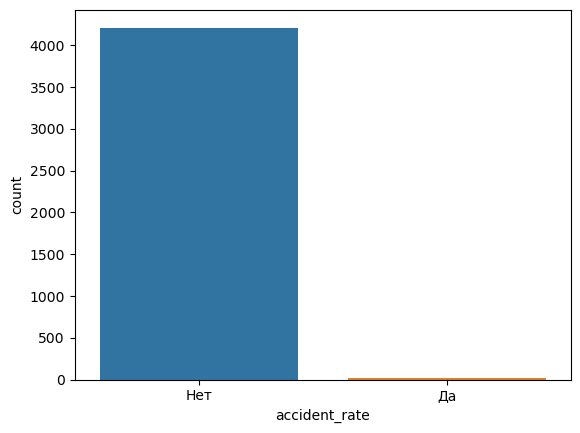

In [88]:
sns.countplot(data=df_cian, x='accident_rate')

<Axes: xlabel='finishing', ylabel='count'>

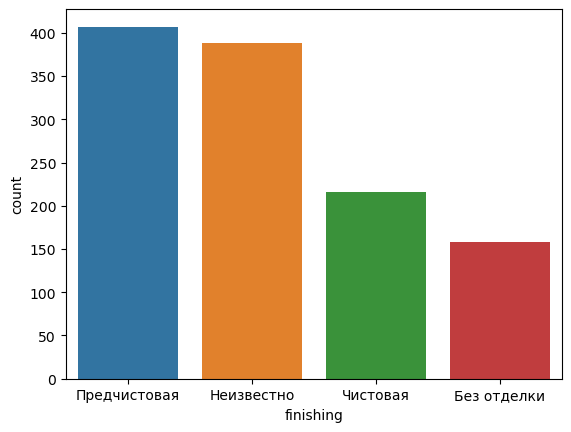

In [89]:
sns.countplot(data=df_cian, x='finishing', order = df_cian['finishing'].value_counts().index[:4])

# Анализ признаков

<Axes: xlabel='price', ylabel='Count'>

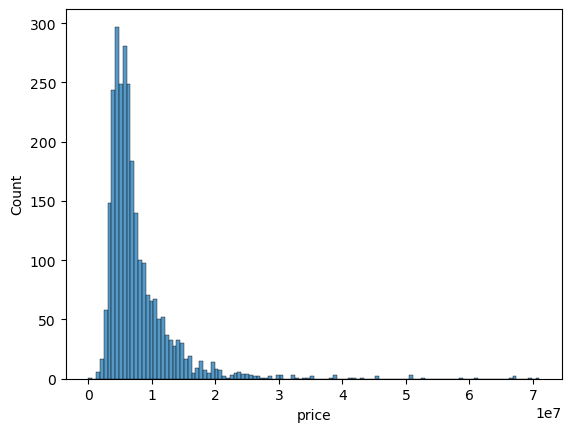

In [90]:
sns.histplot(data = df_domclick, x = 'price')

In [91]:
#df_domclick.query('price > 100000000')

<Axes: xlabel='price', ylabel='Count'>

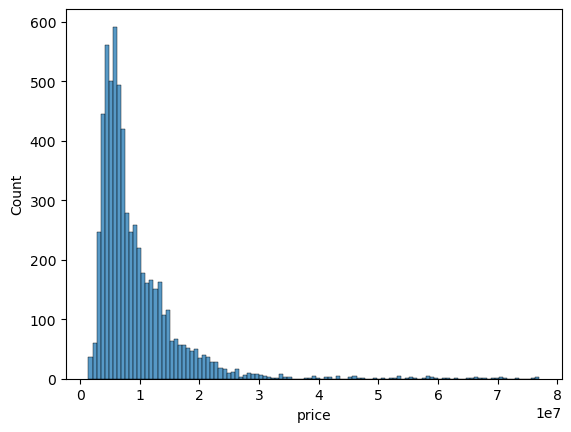

In [92]:
sns.histplot(data = df_cian, x = 'price')

<Axes: xlabel='house_floors', ylabel='Count'>

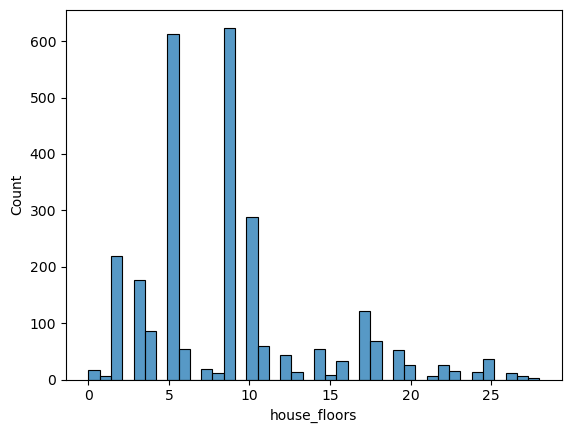

In [93]:
sns.histplot(data = df_domclick, x = 'house_floors')

<Axes: xlabel='total_floors', ylabel='Count'>

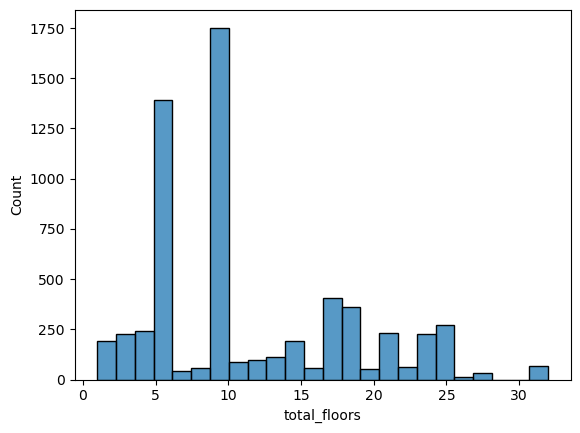

In [94]:
sns.histplot(data = df_cian, x = 'total_floors')

In [95]:
df_cian.query('total_floors > 150')

,name,price,price_for_metr,floor_object,total_floors,type_of_home,square_home,live_square,kitchen_square,height_ceiling,bathroom,balcony,repair,yer_home,garbage_chute,type_home,type_of_overlap,entrances,heating,accident_rate,gas_supply,finishing,number_of_elevators,address,link,room_count


<Axes: xlabel='objectInfo_floor', ylabel='Count'>

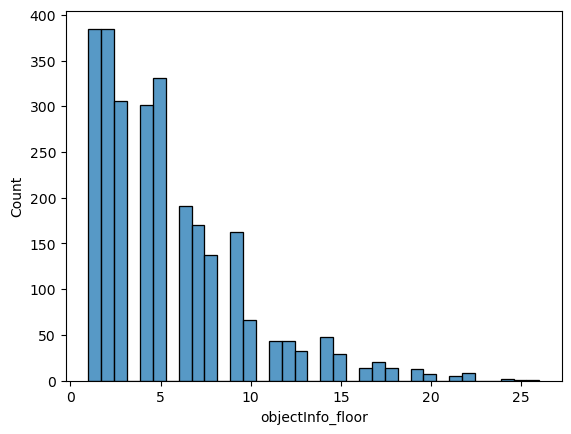

In [96]:
sns.histplot(data = df_domclick, x = 'objectInfo_floor')

<Axes: xlabel='floor_object', ylabel='Count'>

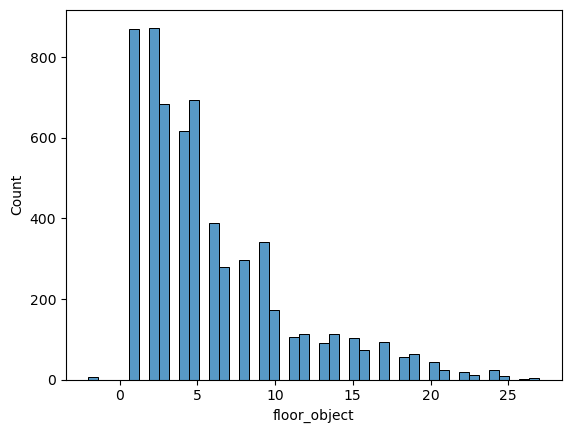

In [97]:
sns.histplot(data = df_cian, x = 'floor_object')

In [98]:
df_cian.query('floor_object < 0')

,name,price,price_for_metr,floor_object,total_floors,type_of_home,square_home,live_square,kitchen_square,height_ceiling,bathroom,balcony,repair,yer_home,garbage_chute,type_home,type_of_overlap,entrances,heating,accident_rate,gas_supply,finishing,number_of_elevators,address,link,room_count
3,1-комн. квартира,1500000,96774,-2,25,Новостройка,15.5,NaN,NaN,2.7,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,False,Неизвестно,NaN,"Нижегородская область, Нижний Новгород, р-н Ка...",https://nn.cian.ru/sale/flat/294499347/,1
59,1-комн. квартира,1650000,112245,-2,25,Новостройка,14.7,NaN,NaN,2.7,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,False,Неизвестно,NaN,"Нижегородская область, Нижний Новгород, р-н Ка...",https://nn.cian.ru/sale/flat/294499388/,1
61,1-комн. квартира,1650000,104430,-2,25,Новостройка,15.8,NaN,NaN,2.7,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,False,Неизвестно,NaN,"Нижегородская область, Нижний Новгород, р-н Ка...",https://nn.cian.ru/sale/flat/294499264/,1
63,1-комн. квартира,1750000,94086,-2,25,Новостройка,18.6,NaN,NaN,2.7,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,False,Неизвестно,NaN,"Нижегородская область, Нижний Новгород, р-н Ка...",https://nn.cian.ru/sale/flat/294499314/,1
65,1-комн. квартира,1750000,104790,-2,25,Новостройка,16.7,NaN,NaN,2.7,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,False,Неизвестно,NaN,"Нижегородская область, Нижний Новгород, р-н Ка...",https://nn.cian.ru/sale/flat/294499189/,1
67,1-комн. квартира,1850000,105714,-2,25,Новостройка,17.5,NaN,NaN,2.7,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,False,Неизвестно,NaN,"Нижегородская область, Нижний Новгород, р-н Ка...",https://nn.cian.ru/sale/flat/294499342/,1


<Axes: xlabel='objectInfo_area', ylabel='Count'>

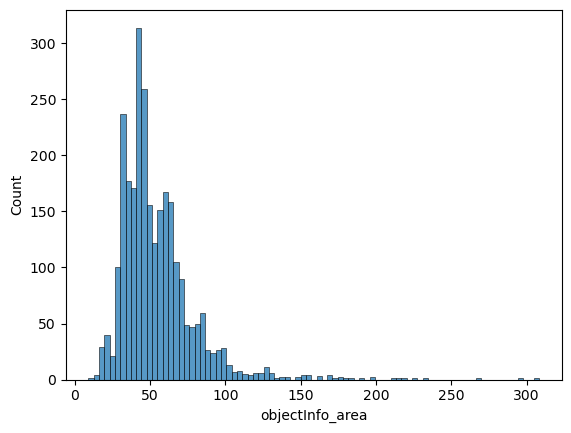

In [99]:
sns.histplot(data = df_domclick, x = 'objectInfo_area')

<Axes: xlabel='square_home', ylabel='Count'>

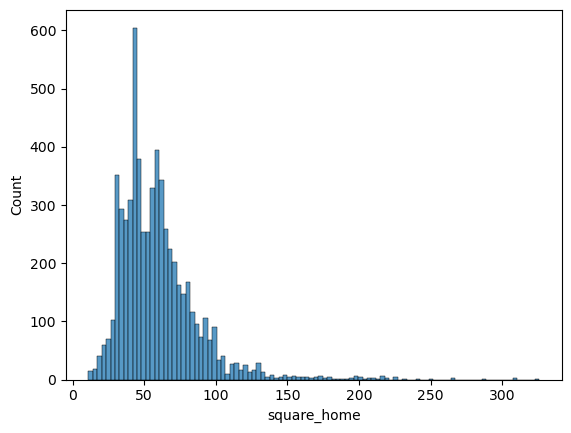

In [100]:
sns.histplot(data = df_cian, x = 'square_home')

<Axes: xlabel='objectInfo_livingArea', ylabel='Count'>

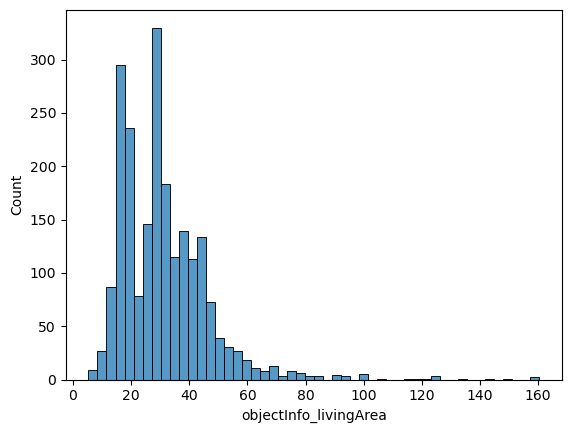

In [101]:
sns.histplot(data = df_domclick, x = 'objectInfo_livingArea')

<Axes: xlabel='live_square', ylabel='Count'>

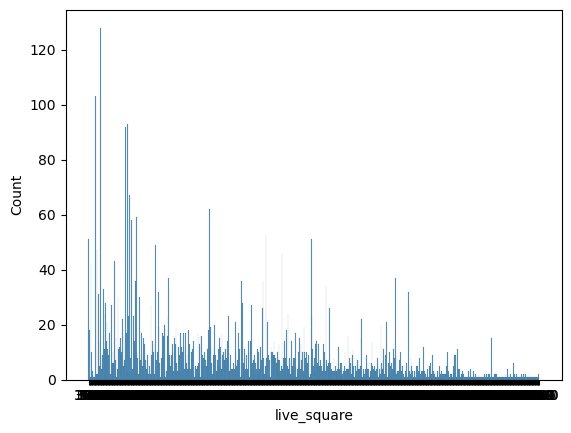

In [102]:
sns.histplot(data = df_cian, x = 'live_square')

<Axes: xlabel='objectInfo_kitchenArea', ylabel='Count'>

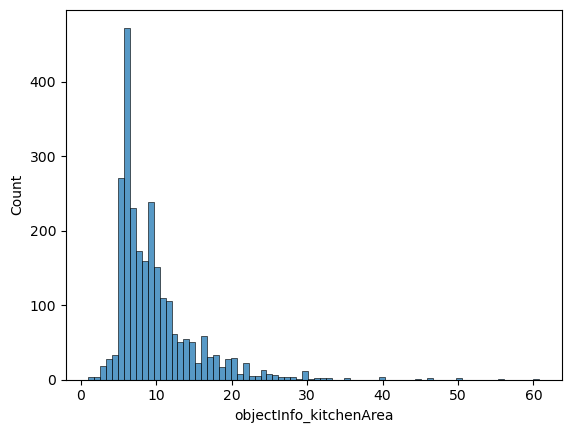

In [103]:
sns.histplot(data = df_domclick, x = 'objectInfo_kitchenArea')

<Axes: xlabel='kitchen_square', ylabel='Count'>

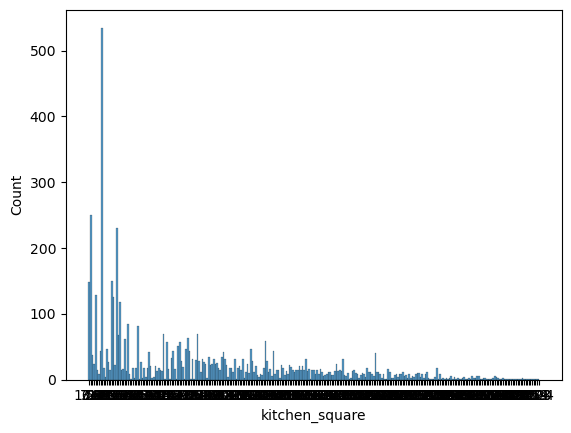

In [104]:
sns.histplot(data = df_cian, x = 'kitchen_square')

<Axes: xlabel='house_ceilingHeight', ylabel='Count'>

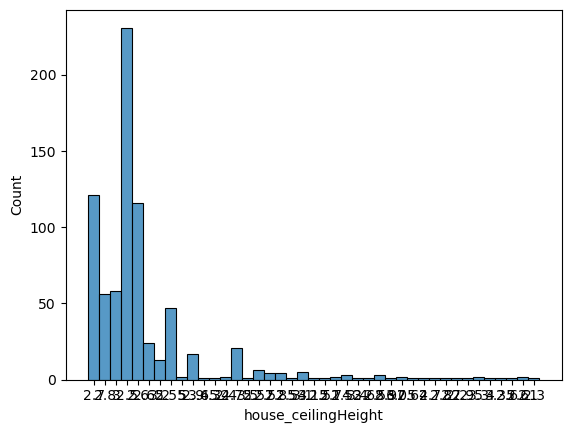

In [105]:
sns.histplot(data = df_domclick, x = 'house_ceilingHeight')

<Axes: xlabel='height_ceiling', ylabel='Count'>

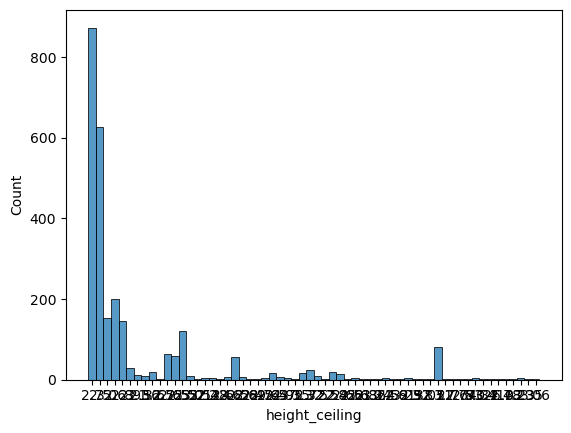

In [106]:
sns.histplot(data = df_cian, x = 'height_ceiling')

<Axes: xlabel='house_buildYear', ylabel='Count'>

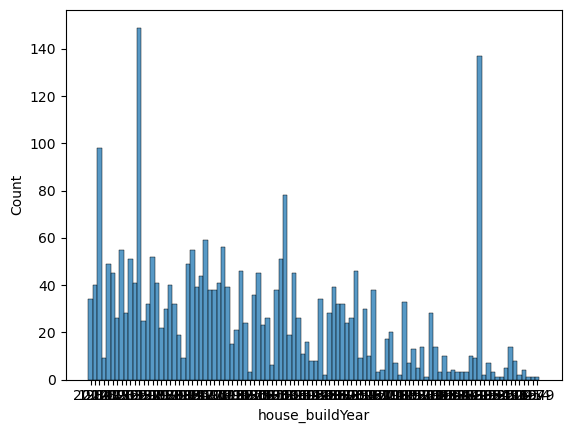

In [107]:
sns.histplot(data = df_domclick, x = 'house_buildYear')

<Axes: xlabel='yer_home', ylabel='Count'>

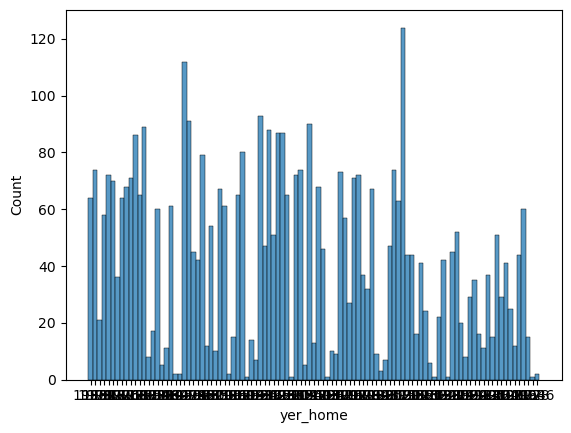

In [108]:
sns.histplot(data = df_cian, x = 'yer_home')

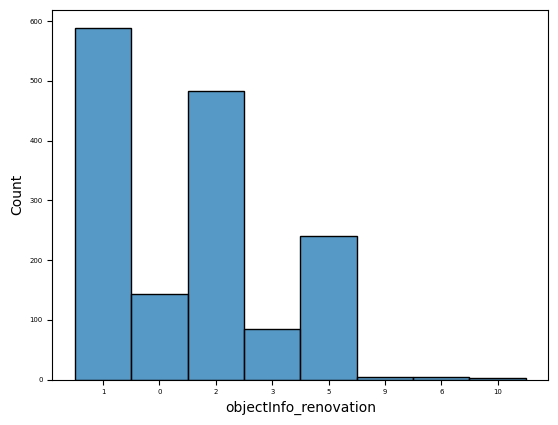

In [109]:
b = sns.histplot(data = df_domclick, x = 'objectInfo_renovation')
b.tick_params(labelsize=5)

In [110]:
df_domclick['objectInfo_renovation'].unique()

array(['1', nan, '0', '2', '3', '5', '9', '6', '10'], dtype=object)

<Axes: xlabel='repair', ylabel='Count'>

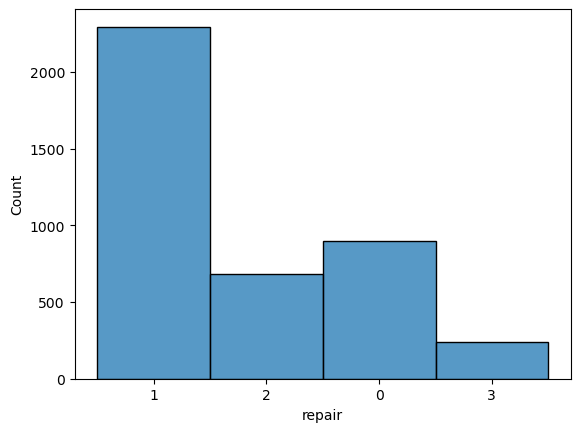

In [111]:
sns.histplot(data = df_cian, x = 'repair')

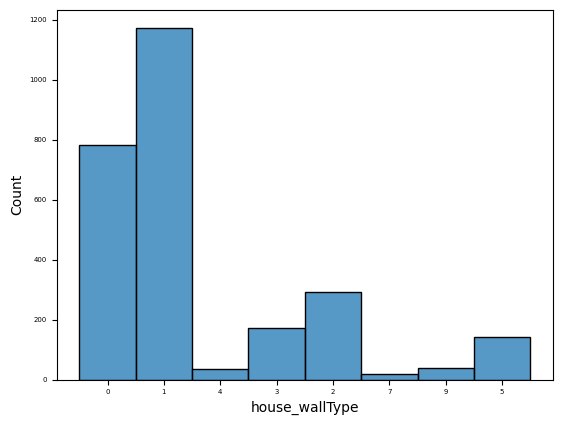

In [112]:
b = sns.histplot(data = df_domclick, x = 'house_wallType')
b.tick_params(labelsize=5)

In [113]:
df_domclick['house_wallType'].unique()

array(['0', '1', '4', '3', '2', '7', '9', nan, '5'], dtype=object)

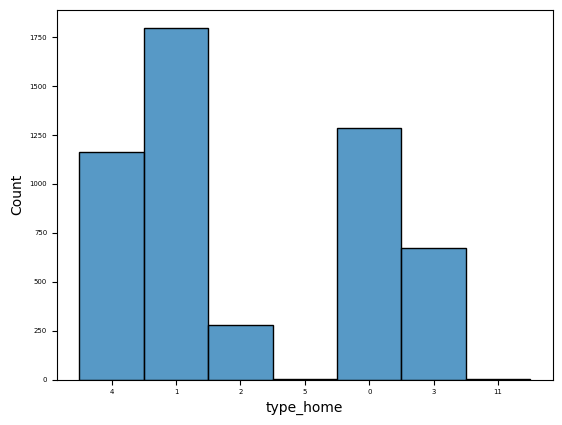

In [114]:
b = sns.histplot(data = df_cian, x = 'type_home')
b.tick_params(labelsize=5)

In [115]:
df_cian['type_home'].unique()

array(['4', nan, '1', '2', '5', '0', '3', '11'], dtype=object)

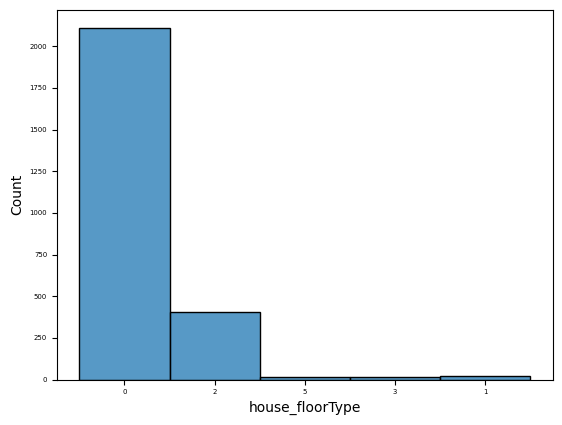

In [116]:
b = sns.histplot(data = df_domclick, x = 'house_floorType')
b.tick_params(labelsize=5)

In [117]:
df_domclick['house_floorType'].unique()

array(['0', nan, '2', '5', '3', '1'], dtype=object)

<Axes: xlabel='type_of_overlap', ylabel='Count'>

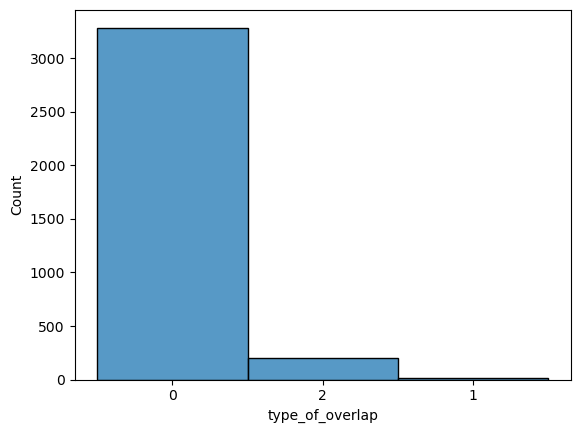

In [118]:
sns.histplot(data = df_cian, x = 'type_of_overlap')

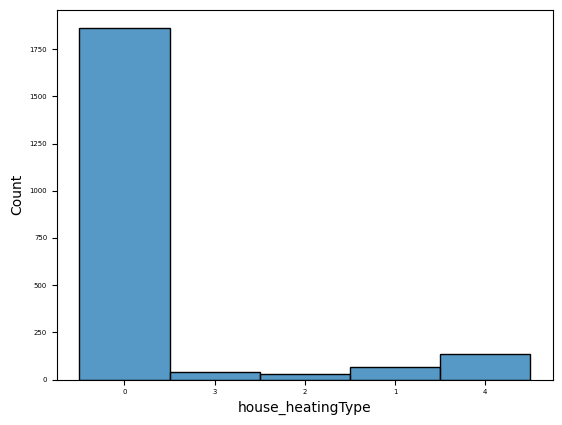

In [119]:
b = sns.histplot(data = df_domclick, x = 'house_heatingType')
b.tick_params(labelsize=5)

In [120]:
df_domclick['house_heatingType'].unique()

array(['0', nan, '3', '2', '1', '4'], dtype=object)

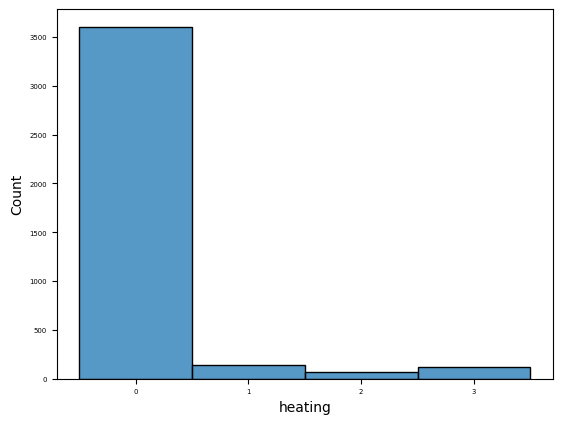

In [121]:
b = sns.histplot(data = df_cian, x = 'heating')
b.tick_params(labelsize=5)

In [122]:
df_cian['heating'].unique()

array([nan, '0', '1', '2', '3'], dtype=object)

<Axes: xlabel='house_entranceCount', ylabel='count'>

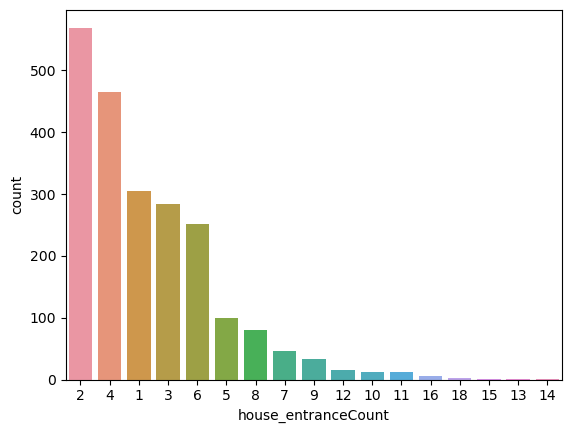

In [123]:
sns.countplot(data = df_domclick, x = 'house_entranceCount', order = df_domclick['house_entranceCount'].value_counts().index)

<Axes: xlabel='entrances', ylabel='count'>

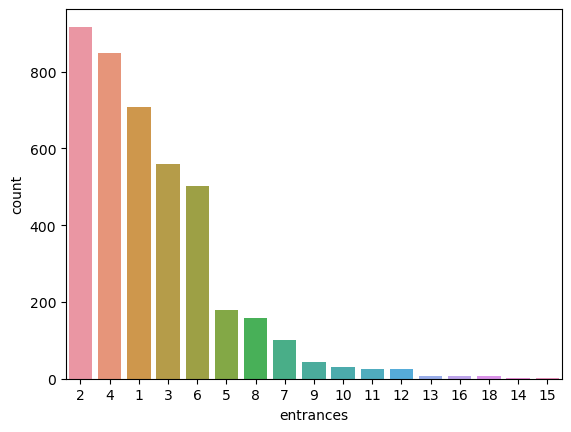

In [124]:
sns.countplot(data = df_cian, x = 'entrances', order = df_cian['entrances'].value_counts().index)

<Axes: xlabel='house_elevatorsCount', ylabel='count'>

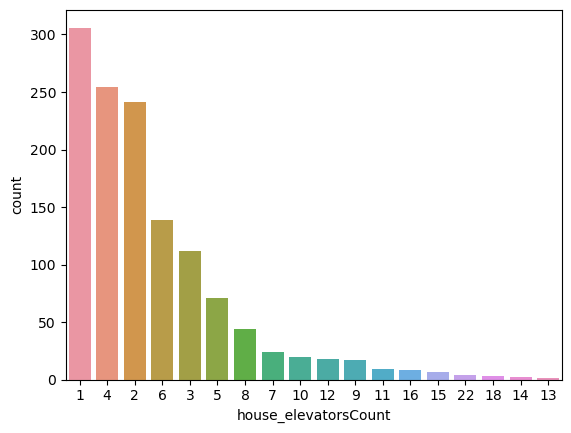

In [125]:
sns.countplot(data = df_domclick, x = 'house_elevatorsCount', order = df_domclick['house_elevatorsCount'].value_counts().index)

<Axes: xlabel='number_of_elevators', ylabel='count'>

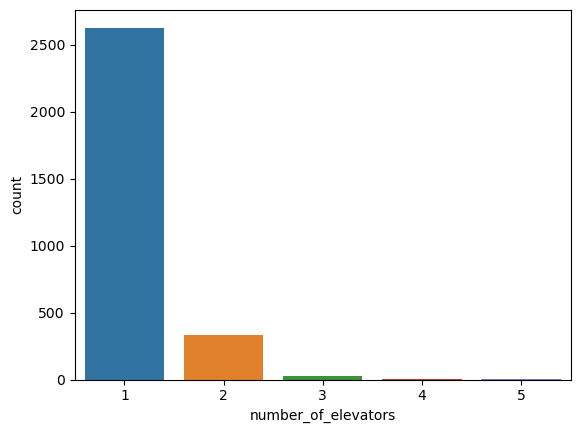

In [126]:
sns.countplot(data = df_cian, x = 'number_of_elevators', order = df_cian['number_of_elevators'].value_counts().index)

# Кодирование данных

In [127]:
df_domclick_prepared = df_domclick.drop(columns = ['id', 'region', 'address', 'house_areaCommonPropery', 'house_areaResidential', 'objectInfo_loggias', 'saleType'])

cat_cols = ['house_hasGarbageDisposer', 'house_coldWaterType', 'house_electricalType', 'house_energyEfficiency',
           'house_fireFightingType', 'house_foundationType', 'house_sewerageType', 'house_ventilationType', 'objectInfo_hasGas']



df_domclick_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2715 entries, 0 to 2714
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       2715 non-null   float64
 1   longitude                      2715 non-null   float64
 2   price                          2715 non-null   int64  
 3   house_floors                   2715 non-null   int64  
 4   house_buildYear                2683 non-null   object 
 5   house_ceilingHeight            760 non-null    object 
 6   house_hasGarbageDisposer       1958 non-null   object 
 7   house_liftsFreight             948 non-null    float64
 8   house_liftsPassenger           1721 non-null   float64
 9   house_wallType                 2654 non-null   object 
 10  house_areaNonResidential       1845 non-null   object 
 11  house_basementArea             1781 non-null   object 
 12  house_chuteCount               897 non-null    o

In [128]:
mappc_d = {}
ord_enc = OrdinalEncoder()

df_domclick_prepared[cat_cols] = ord_enc.fit_transform(df_domclick_prepared[cat_cols])
df_domclick_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2715 entries, 0 to 2714
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       2715 non-null   float64
 1   longitude                      2715 non-null   float64
 2   price                          2715 non-null   int64  
 3   house_floors                   2715 non-null   int64  
 4   house_buildYear                2683 non-null   object 
 5   house_ceilingHeight            760 non-null    object 
 6   house_hasGarbageDisposer       1958 non-null   float64
 7   house_liftsFreight             948 non-null    float64
 8   house_liftsPassenger           1721 non-null   float64
 9   house_wallType                 2654 non-null   object 
 10  house_areaNonResidential       1845 non-null   object 
 11  house_basementArea             1781 non-null   object 
 12  house_chuteCount               897 non-null    o

In [129]:
non_num_cols = ['price', 'house_buildYear', 'house_ceilingHeight', 'house_areaNonResidential', 'house_basementArea', 'house_chuteCount',
               'house_electricalEntriesCount', 'house_elevatorsCount', 'house_entranceCount', 'house_parkingSquare', 'house_sewerageCesspoolsVolume',
               'objectInfo_area', 'objectInfo_connectedBathrooms', 'objectInfo_separatedBathrooms', 'house_wallType', 'house_floorType',
                'house_heatingType', 'objectInfo_renovation']

for col in non_num_cols:
    df_domclick_prepared[col] = pd.to_numeric(df_domclick_prepared[col].astype(str).str.strip(), errors = 'coerce')

In [130]:
df_domclick_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2715 entries, 0 to 2714
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       2715 non-null   float64
 1   longitude                      2715 non-null   float64
 2   price                          2715 non-null   int64  
 3   house_floors                   2715 non-null   int64  
 4   house_buildYear                2683 non-null   float64
 5   house_ceilingHeight            760 non-null    float64
 6   house_hasGarbageDisposer       1958 non-null   float64
 7   house_liftsFreight             948 non-null    float64
 8   house_liftsPassenger           1721 non-null   float64
 9   house_wallType                 2654 non-null   float64
 10  house_areaNonResidential       1845 non-null   float64
 11  house_basementArea             1781 non-null   float64
 12  house_chuteCount               897 non-null    f

In [131]:
df_cian_prepared = df_cian.drop(columns = ['name', 'link', 'address', 'accident_rate'])
                                
cat_cols_cian = ['type_of_home', 'finishing', 'gas_supply']

df_cian_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6176 entries, 3 to 9222
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                6176 non-null   int64  
 1   price_for_metr       6176 non-null   int64  
 2   floor_object         6176 non-null   int64  
 3   total_floors         6176 non-null   int64  
 4   type_of_home         6176 non-null   object 
 5   square_home          6176 non-null   float64
 6   live_square          5187 non-null   object 
 7   kitchen_square       5361 non-null   object 
 8   height_ceiling       2646 non-null   object 
 9   bathroom             4293 non-null   object 
 10  balcony              3577 non-null   object 
 11  repair               4116 non-null   object 
 12  yer_home             4220 non-null   object 
 13  garbage_chute        1285 non-null   object 
 14  type_home            5200 non-null   object 
 15  type_of_overlap      3499 non-null   object

In [132]:
mappc_d = {}
ord_enc = OrdinalEncoder()

df_cian_prepared[cat_cols_cian] = ord_enc.fit_transform(df_cian_prepared[cat_cols_cian])
df_cian_prepared = df_cian_prepared.replace('Да', 1)
df_cian_prepared = df_cian_prepared.replace('Нет', 0)
df_cian_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6176 entries, 3 to 9222
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                6176 non-null   int64  
 1   price_for_metr       6176 non-null   int64  
 2   floor_object         6176 non-null   int64  
 3   total_floors         6176 non-null   int64  
 4   type_of_home         6176 non-null   float64
 5   square_home          6176 non-null   float64
 6   live_square          5187 non-null   object 
 7   kitchen_square       5361 non-null   object 
 8   height_ceiling       2646 non-null   object 
 9   bathroom             4293 non-null   object 
 10  balcony              3577 non-null   object 
 11  repair               4116 non-null   object 
 12  yer_home             4220 non-null   object 
 13  garbage_chute        1285 non-null   float64
 14  type_home            5200 non-null   object 
 15  type_of_overlap      3499 non-null   object

In [133]:
non_num_cols_cian = ['live_square', 'kitchen_square', 'height_ceiling', 'bathroom', 'balcony', 'yer_home',
                     'entrances', 'number_of_elevators', 'room_count', 'repair', 'type_home', 'type_of_overlap', 'heating']

for col in non_num_cols_cian:
    df_cian_prepared[col] = pd.to_numeric(df_cian_prepared[col].astype(str).str.strip(), errors = 'coerce')

In [134]:
df_cian_prepared.info()
df_cian_prepared.head()

<class 'pandas.core.frame.DataFrame'>
Index: 6176 entries, 3 to 9222
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                6176 non-null   int64  
 1   price_for_metr       6176 non-null   int64  
 2   floor_object         6176 non-null   int64  
 3   total_floors         6176 non-null   int64  
 4   type_of_home         6176 non-null   float64
 5   square_home          6176 non-null   float64
 6   live_square          5187 non-null   float64
 7   kitchen_square       5361 non-null   float64
 8   height_ceiling       2646 non-null   float64
 9   bathroom             4293 non-null   float64
 10  balcony              3577 non-null   float64
 11  repair               4116 non-null   float64
 12  yer_home             4220 non-null   float64
 13  garbage_chute        1285 non-null   float64
 14  type_home            5200 non-null   float64
 15  type_of_overlap      3499 non-null   float6

,price,price_for_metr,floor_object,total_floors,type_of_home,square_home,live_square,kitchen_square,height_ceiling,bathroom,balcony,repair,yer_home,garbage_chute,type_home,type_of_overlap,entrances,heating,gas_supply,finishing,number_of_elevators,room_count
3,1500000,96774,-2,25,3.0,15.5,NaN,NaN,2.7,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,0.0,1.0,NaN,1
4,1500000,48387,2,2,0.0,31.0,16.0,10.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1
5,1600000,28881,2,2,0.0,55.4,30.8,7.0,2.5,1.0,NaN,1.0,1983.0,NaN,1.0,0.0,1.0,0.0,1.0,NaN,NaN,2
6,1400000,126126,1,5,1.0,11.1,3.1,3.0,2.5,1.0,NaN,2.0,1971.0,NaN,1.0,0.0,1.0,0.0,1.0,NaN,NaN,0
8,1600000,30418,2,2,0.0,52.6,39.0,7.3,NaN,NaN,NaN,1.0,1952.0,NaN,NaN,2.0,2.0,0.0,1.0,NaN,NaN,3


In [135]:
df_domclick_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2715 entries, 0 to 2714
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       2715 non-null   float64
 1   longitude                      2715 non-null   float64
 2   price                          2715 non-null   int64  
 3   house_floors                   2715 non-null   int64  
 4   house_buildYear                2683 non-null   float64
 5   house_ceilingHeight            760 non-null    float64
 6   house_hasGarbageDisposer       1958 non-null   float64
 7   house_liftsFreight             948 non-null    float64
 8   house_liftsPassenger           1721 non-null   float64
 9   house_wallType                 2654 non-null   float64
 10  house_areaNonResidential       1845 non-null   float64
 11  house_basementArea             1781 non-null   float64
 12  house_chuteCount               897 non-null    f

# Соединение датасетов

In [136]:
common_features = ['price', 'room_count', 'floor', 'totalFloors', 'area', 'kitchenArea', 'livingArea', 'ceilingHeight', 'bathroomCount', 
                   'balconyCount', 'repairType', 'buildYear', 'hasGarbageChute', 'wallType', 'floorType', 'entranceCount',
                   'heatingType', 'hasGas', 'elevatorCount']

domclick_cf = ['price', 'objectInfo_rooms', 'objectInfo_floor', 'house_floors', 'objectInfo_area', 'objectInfo_kitchenArea', 'objectInfo_livingArea', 
               'house_ceilingHeight', 'objectInfo_separatedBathrooms', 'objectInfo_balconies', 'objectInfo_renovation', 'house_buildYear',
               'house_hasGarbageDisposer', 'house_wallType', 'house_floorType', 'house_entranceCount', 'house_heatingType', 
               'objectInfo_hasGas', 'house_elevatorsCount']

cian_cf = ['price', 'room_count', 'floor_object', 'total_floors', 'square_home', 'kitchen_square', 'live_square', 'height_ceiling', 'bathroom',
           'balcony', 'repair', 'yer_home',  'type_home', 'type_of_overlap', 'entrances', 'heating', 'gas_supply',
           'number_of_elevators']

In [137]:
cat_cols_cian = ['repair', 'garbage_chute', 'type_home', 'type_of_overlap', 'heating', 'gas_supply']

cat_cols_domclick = ['objectInfo_renovation', 'house_hasGarbageDisposer', 'house_wallType', 'house_floorType',
                     'house_heatingType', 'objectInfo_hasGas']

In [138]:
df_domclick['objectInfo_separatedBathrooms'].unique()

array(['0', '1', nan, '2'], dtype=object)

In [139]:
for col_cian, col_domclick in zip(cat_cols_cian, cat_cols_domclick):
    df_cian[col_cian].unique()
    df_domclick[col_domclick].unique()

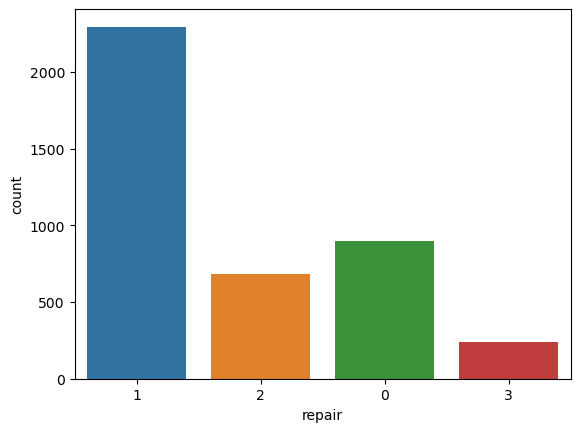

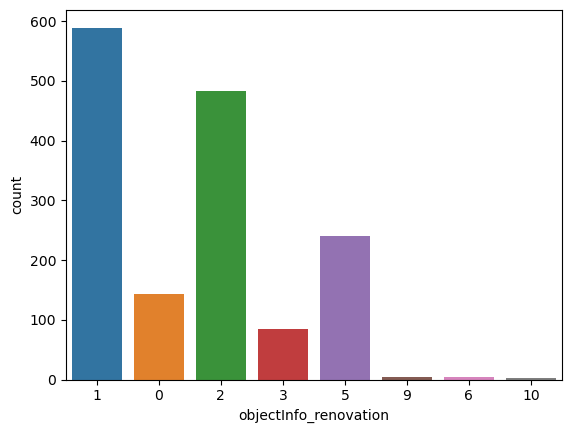

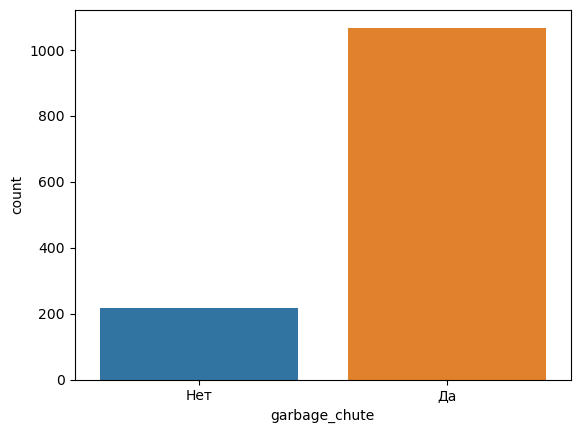

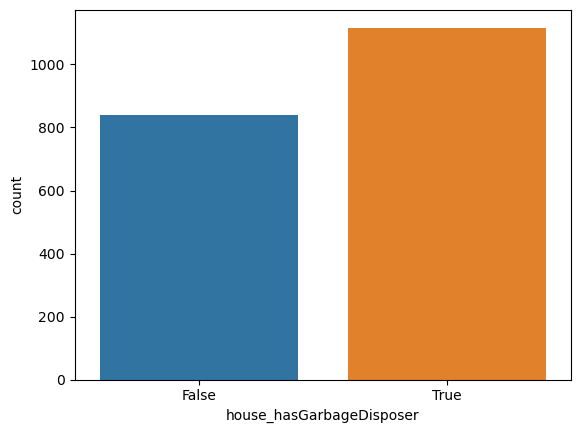

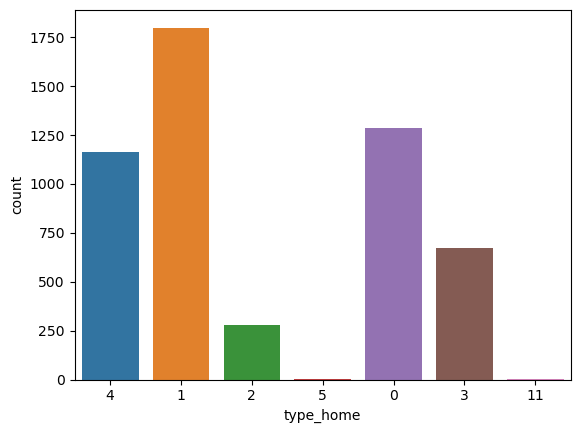

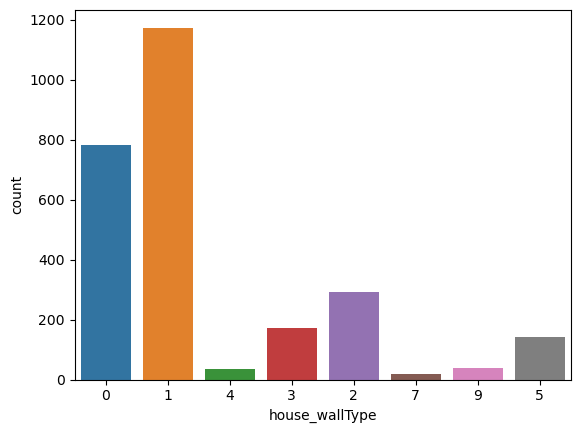

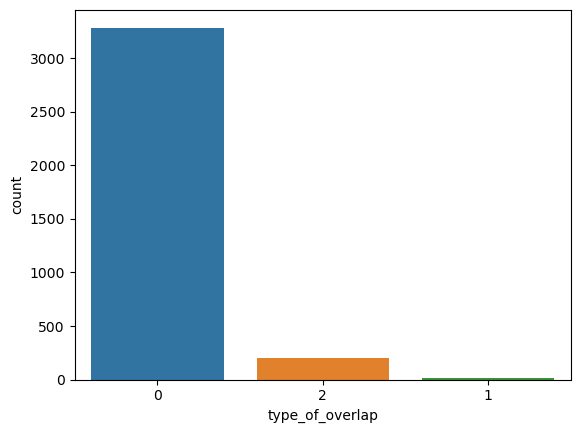

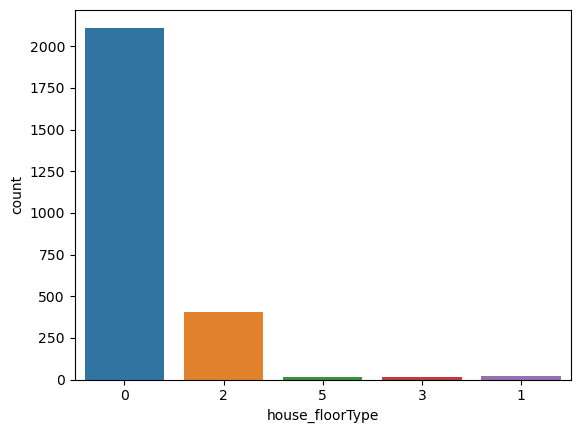

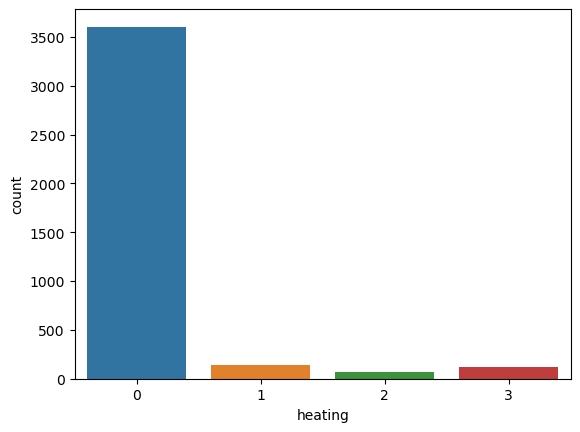

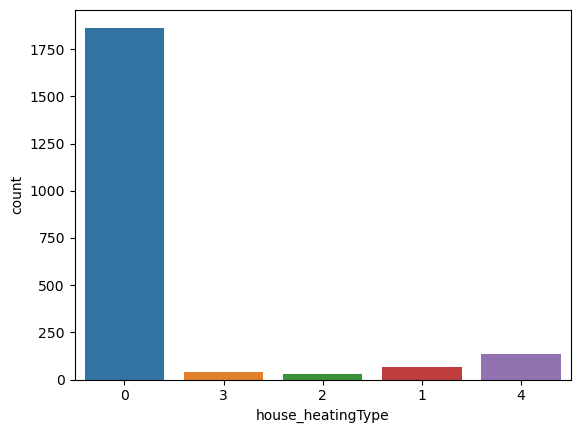

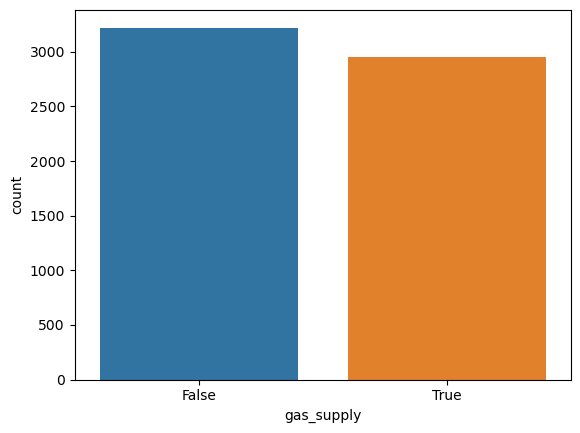

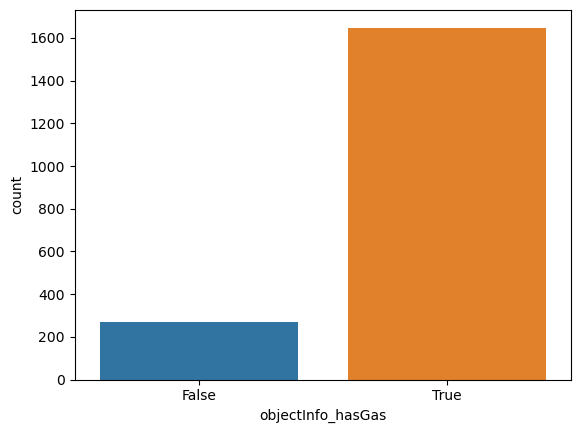

<Figure size 640x480 with 0 Axes>

In [140]:
for col_cian, col_domclick in zip(cat_cols_cian, cat_cols_domclick):
    sns.countplot(data = df_cian, x = col_cian)
    plt.figure()
    sns.countplot(data = df_domclick, x = col_domclick)
    plt.figure()

In [141]:
cat_cols_cian = ['repair', 'garbage_chute', 'type_home', 'type_of_overlap', 'heating', 'gas_supply']

cat_cols_domclick = ['objectInfo_renovation', 'house_hasGarbageDisposer', 'house_wallType', 'house_floorType',
                     'house_heatingType', 'objectInfo_hasGas']

In [142]:
common_features = ['price', 'room_count', 'floor', 'totalFloors', 'area', 'kitchenArea', 'livingArea', 'ceilingHeight', 'bathroomCount', 
                   'balconyCount', 'repairType', 'buildYear', 'hasGarbageChute', 'wallType', 'floorType', 'entranceCount',
                   'heatingType', 'hasGas', 'elevatorCount']

domclick_cf = ['price', 'objectInfo_rooms', 'objectInfo_floor', 'house_floors', 'objectInfo_area', 'objectInfo_kitchenArea', 'objectInfo_livingArea', 
               'house_ceilingHeight', 'objectInfo_separatedBathrooms', 'objectInfo_balconies', 'objectInfo_renovation', 'house_buildYear',
               'house_hasGarbageDisposer', 'house_wallType', 'house_floorType', 'house_entranceCount', 'house_heatingType', 
               'objectInfo_hasGas', 'house_elevatorsCount']

cian_cf = ['price', 'room_count', 'floor_object', 'total_floors', 'square_home', 'kitchen_square', 'live_square', 'height_ceiling', 'bathroom',
           'balcony', 'repair', 'yer_home', 'garbage_chute',  'type_home', 'type_of_overlap', 'entrances', 'heating', 'gas_supply',
           'number_of_elevators']

In [143]:
merge_domclick = df_domclick_prepared[domclick_cf]
merge_domclick.columns = common_features
merge_domclick.info()
merge_domclick.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2715 entries, 0 to 2714
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            2715 non-null   int64  
 1   room_count       2715 non-null   int64  
 2   floor            2715 non-null   int64  
 3   totalFloors      2715 non-null   int64  
 4   area             2715 non-null   float64
 5   kitchenArea      2538 non-null   float64
 6   livingArea       2159 non-null   float64
 7   ceilingHeight    760 non-null    float64
 8   bathroomCount    1149 non-null   float64
 9   balconyCount     2715 non-null   int64  
 10  repairType       1552 non-null   float64
 11  buildYear        2683 non-null   float64
 12  hasGarbageChute  1958 non-null   float64
 13  wallType         2654 non-null   float64
 14  floorType        2570 non-null   float64
 15  entranceCount    2184 non-null   float64
 16  heatingType      2135 non-null   float64
 17  hasGas        

,price,room_count,floor,totalFloors,area,kitchenArea,livingArea,ceilingHeight,bathroomCount,balconyCount,repairType,buildYear,hasGarbageChute,wallType,floorType,entranceCount,heatingType,hasGas,elevatorCount
0,5799000,2,13,17,39.6,NaN,NaN,NaN,0.0,1,1.0,2014.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,4400000,1,5,9,34.5,8.0,18.7,NaN,1.0,0,NaN,1984.0,1.0,1.0,0.0,5.0,0.0,1.0,5.0
2,13900000,2,3,18,70.3,10.4,43.0,2.7,1.0,0,0.0,2023.0,NaN,4.0,0.0,NaN,NaN,NaN,NaN
3,10100000,2,9,9,75.0,10.7,39.0,2.8,1.0,1,2.0,2001.0,NaN,3.0,0.0,2.0,0.0,1.0,2.0
4,16500000,3,4,10,97.7,17.1,50.3,3.0,1.0,2,2.0,2014.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN


In [144]:
merge_domclick['repairType'].unique()

array([ 1., nan,  0.,  2.,  3.,  5.,  9.,  6., 10.])

In [145]:
merge_cian = df_cian_prepared[cian_cf]
merge_cian.columns = common_features
merge_cian.reset_index(drop = True, inplace=True)
merge_cian.info()
merge_cian.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6176 entries, 0 to 6175
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            6176 non-null   int64  
 1   room_count       6176 non-null   int64  
 2   floor            6176 non-null   int64  
 3   totalFloors      6176 non-null   int64  
 4   area             6176 non-null   float64
 5   kitchenArea      5361 non-null   float64
 6   livingArea       5187 non-null   float64
 7   ceilingHeight    2646 non-null   float64
 8   bathroomCount    4293 non-null   float64
 9   balconyCount     3577 non-null   float64
 10  repairType       4116 non-null   float64
 11  buildYear        4220 non-null   float64
 12  hasGarbageChute  1285 non-null   float64
 13  wallType         5200 non-null   float64
 14  floorType        3499 non-null   float64
 15  entranceCount    4123 non-null   float64
 16  heatingType      3934 non-null   float64
 17  hasGas        

,price,room_count,floor,totalFloors,area,kitchenArea,livingArea,ceilingHeight,bathroomCount,balconyCount,repairType,buildYear,hasGarbageChute,wallType,floorType,entranceCount,heatingType,hasGas,elevatorCount
0,1500000,1,-2,25,15.5,NaN,NaN,2.7,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,0.0,NaN
1,1500000,1,2,2,31.0,10.0,16.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,1600000,2,2,2,55.4,7.0,30.8,2.5,1.0,NaN,1.0,1983.0,NaN,1.0,0.0,1.0,0.0,1.0,NaN
3,1400000,0,1,5,11.1,3.0,3.1,2.5,1.0,NaN,2.0,1971.0,NaN,1.0,0.0,1.0,0.0,1.0,NaN
4,1600000,3,2,2,52.6,7.3,39.0,NaN,NaN,NaN,1.0,1952.0,NaN,NaN,2.0,2.0,0.0,1.0,NaN


In [146]:
df_combined = pd.concat([merge_domclick, merge_cian])

In [147]:
df_combined = df_combined.drop_duplicates()

In [148]:
df_combined.reset_index(drop = True, inplace=True)

In [149]:
df_combined.info()
df_combined.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8863 entries, 0 to 8862
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            8863 non-null   int64  
 1   room_count       8863 non-null   int64  
 2   floor            8863 non-null   int64  
 3   totalFloors      8863 non-null   int64  
 4   area             8863 non-null   float64
 5   kitchenArea      7876 non-null   float64
 6   livingArea       7323 non-null   float64
 7   ceilingHeight    3393 non-null   float64
 8   bathroomCount    5424 non-null   float64
 9   balconyCount     6274 non-null   float64
 10  repairType       5651 non-null   float64
 11  buildYear        6887 non-null   float64
 12  hasGarbageChute  3240 non-null   float64
 13  wallType         7827 non-null   float64
 14  floorType        6053 non-null   float64
 15  entranceCount    6292 non-null   float64
 16  heatingType      6054 non-null   float64
 17  hasGas        

,price,room_count,floor,totalFloors,area,kitchenArea,livingArea,ceilingHeight,bathroomCount,balconyCount,repairType,buildYear,hasGarbageChute,wallType,floorType,entranceCount,heatingType,hasGas,elevatorCount
0,5799000,2,13,17,39.6,NaN,NaN,NaN,0.0,1.0,1.0,2014.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,4400000,1,5,9,34.5,8.0,18.7,NaN,1.0,0.0,NaN,1984.0,1.0,1.0,0.0,5.0,0.0,1.0,5.0
2,13900000,2,3,18,70.3,10.4,43.0,2.7,1.0,0.0,0.0,2023.0,NaN,4.0,0.0,NaN,NaN,NaN,NaN
3,10100000,2,9,9,75.0,10.7,39.0,2.8,1.0,1.0,2.0,2001.0,NaN,3.0,0.0,2.0,0.0,1.0,2.0
4,16500000,3,4,10,97.7,17.1,50.3,3.0,1.0,2.0,2.0,2014.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN


<Axes: xlabel='price', ylabel='Count'>

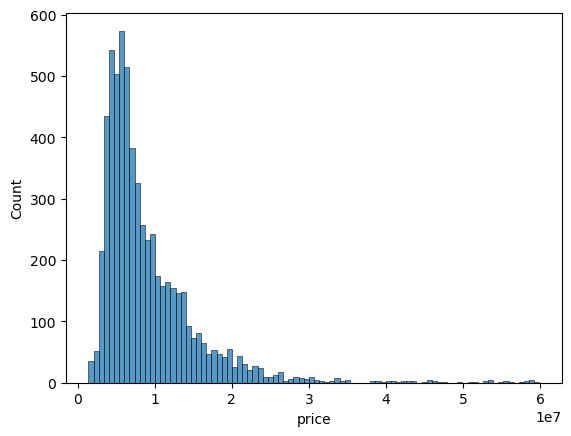

In [150]:
sns.histplot(data = df_cian_prepared.query('price < 60000000'), x = 'price')

<Axes: xlabel='price', ylabel='Count'>

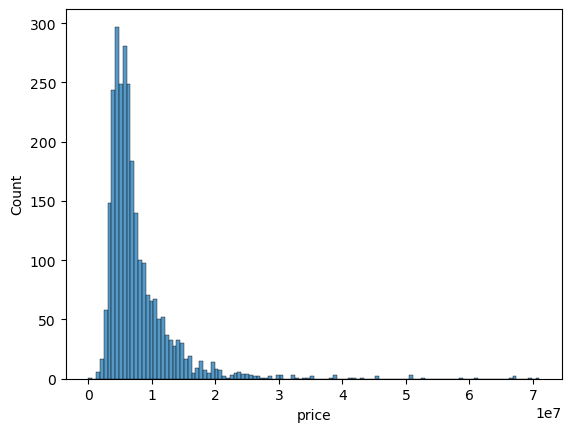

In [151]:
sns.histplot(data = df_domclick_prepared.query('price < 100000000'), x = 'price')

<Axes: xlabel='price', ylabel='Count'>

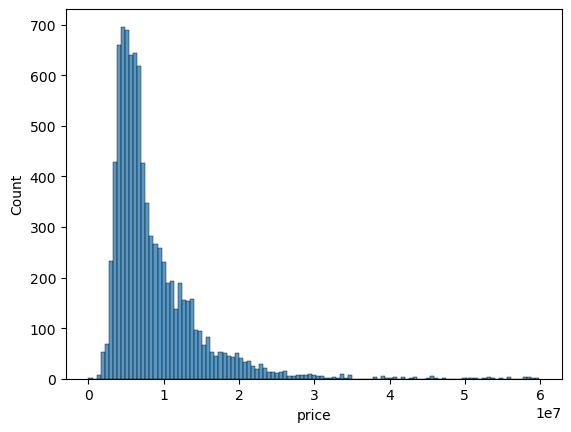

In [152]:
sns.histplot(data = df_combined.query('price < 60000000'), x = 'price')

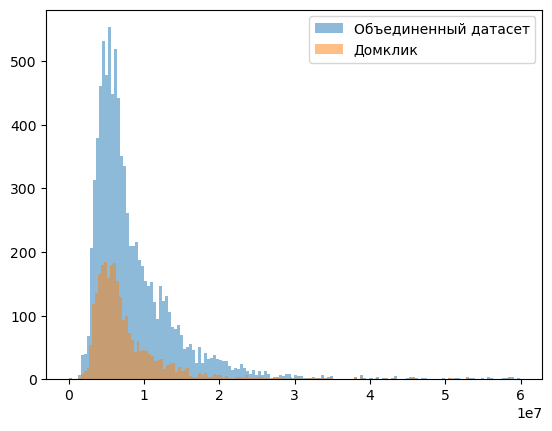

In [153]:
plt.hist(df_combined.query('price < 60000000')['price'], 150, alpha=0.5, label='Объединенный датасет')
plt.hist(df_domclick_prepared.query('price < 60000000')['price'], 150, alpha=0.5, label='Домклик')
plt.legend(loc='upper right')
plt.show()

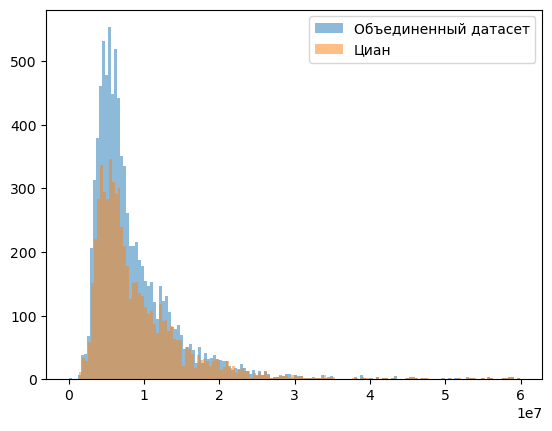

In [154]:
plt.hist(df_combined.query('price < 60000000')['price'], 150, alpha=0.5, label='Объединенный датасет')
plt.hist(df_cian_prepared.query('price < 60000000')['price'], 150, alpha=0.5, label='Циан')
plt.legend(loc='upper right')
plt.show()

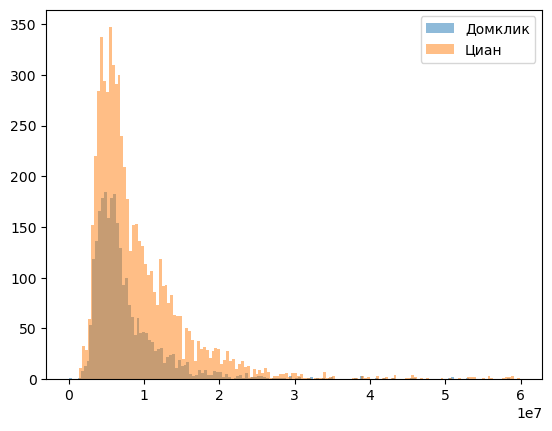

In [155]:
plt.hist(df_domclick_prepared.query('price < 60000000')['price'], 150, alpha=0.5, label='Домклик')
plt.hist(df_cian_prepared.query('price < 60000000')['price'], 150, alpha=0.5, label='Циан')
plt.legend(loc='upper right')
plt.show()

In [156]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [157]:
df_domclick_prepared['price'].describe()

count       2715.00000
mean     7763023.09429
std      5884668.01448
min         6950.00000
25%      4650000.00000
50%      6200000.00000
75%      8873195.00000
max     71000000.00000
Name: price, dtype: float64

In [158]:
df_cian_prepared['price'].describe()

count       6176.00000
mean     9321231.31736
std      7424015.89216
min      1400000.00000
25%      5050000.00000
50%      7097300.00000
75%     11300000.00000
max     77000000.00000
Name: price, dtype: float64

In [159]:
df_combined['price'].describe()

count       8863.00000
mean     8844830.94302
std      7024776.68922
min         6950.00000
25%      4900000.00000
50%      6700000.00000
75%     10500000.00000
max     77000000.00000
Name: price, dtype: float64

In [160]:
cat_cols_cian = ['repair', 'garbage_chute', 'type_home', 'type_of_overlap', 'heating', 'gas_supply']

cat_cols_domclick = ['objectInfo_renovation', 'house_hasGarbageDisposer', 'house_wallType', 'house_floorType',
                     'house_heatingType', 'objectInfo_hasGas']

cat_cols_cf = ['repairType', 'hasGarbageChute', 'wallType', 'floorType', 'heatingType', 'hasGas']

In [161]:
num_cols_cian = ['price', 'floor_object', 'total_floors', 'square_home', 'kitchen_square', 'live_square', 'height_ceiling',
                 'bathroom', 'balcony', 'buildYear', 'entranceCount', 'elevatorCount']

num_cols_domclick = ['price', 'objectInfo_floor', 'house_floors', 'objectInfo_area', 'objectInfo_kitchenArea', 
                     'objectInfo_livingArea', 'house_ceilingHeight', 'objectInfo_separatedBathrooms', 'objectInfo_balconies',
                     'house_buildYear', 'house_entranceCount', 'house_elevatorsCount']

num_cols_cf = ['price', 'floor', 'totalFloors', 'area', 'kitchenArea', 'livingArea', 'ceilingHeight', 'bathroomCount', 
                   'balconyCount', 'buildYear', 'entranceCount', 'elevatorCount']

C:\Users\shadee\AppData\Local\Temp\ipykernel_5828\3097855927.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


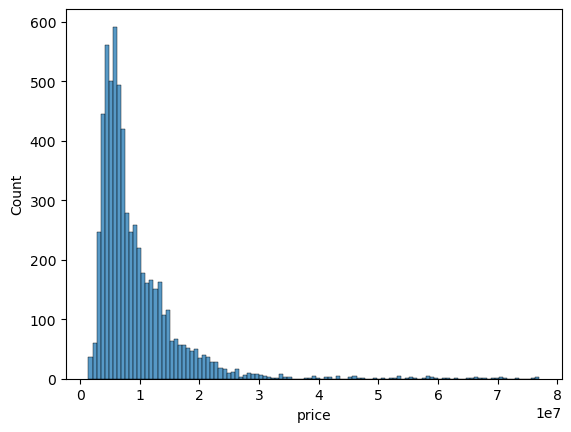

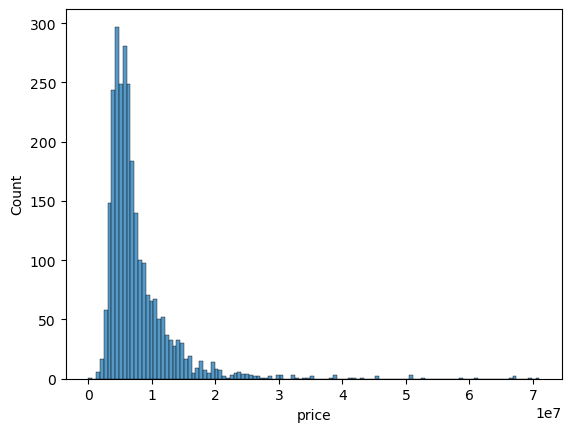

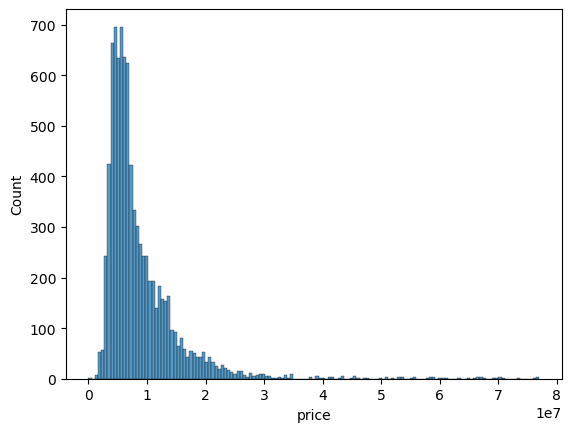

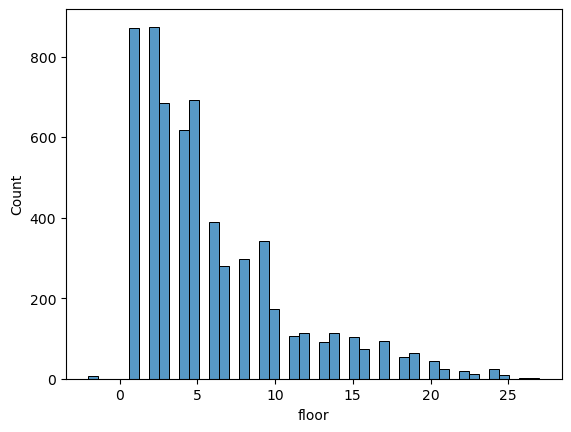

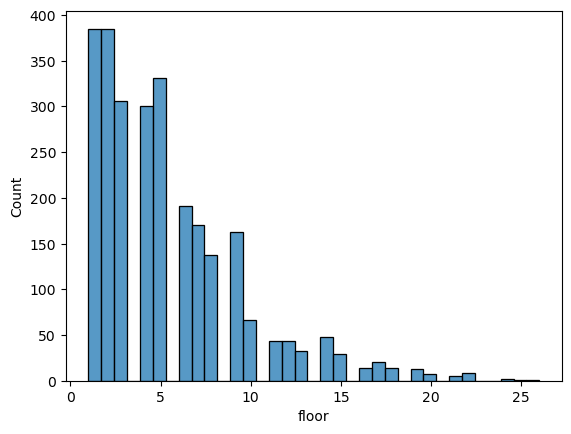

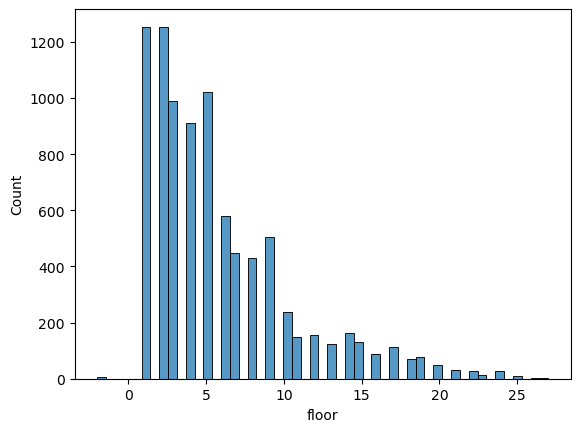

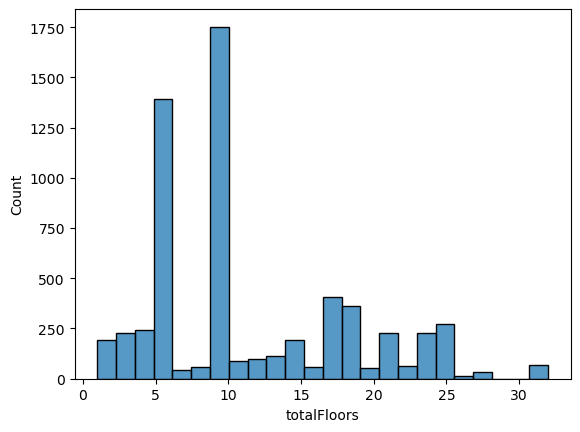

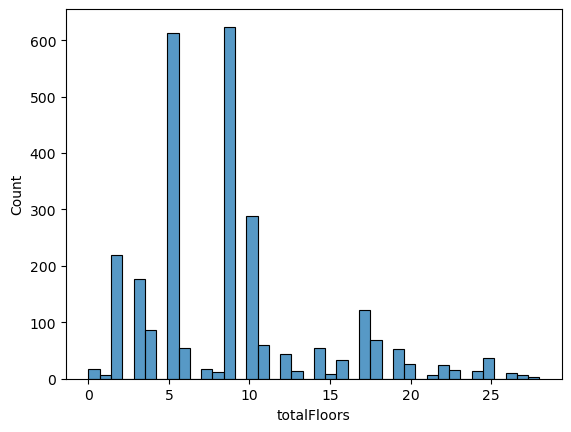

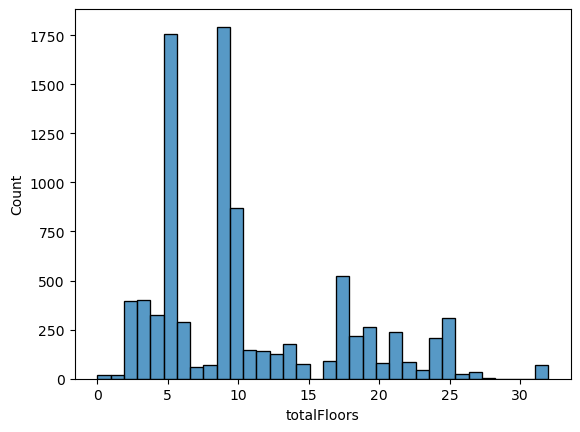

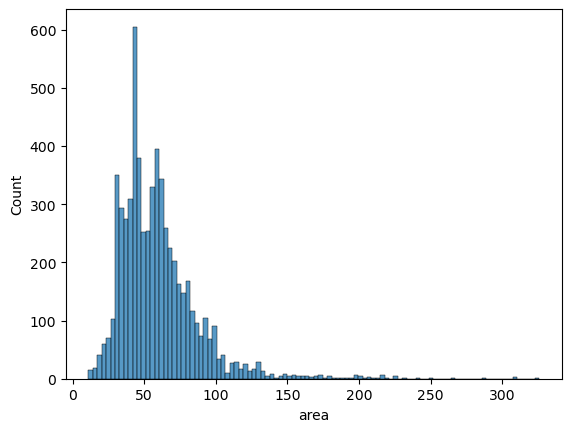

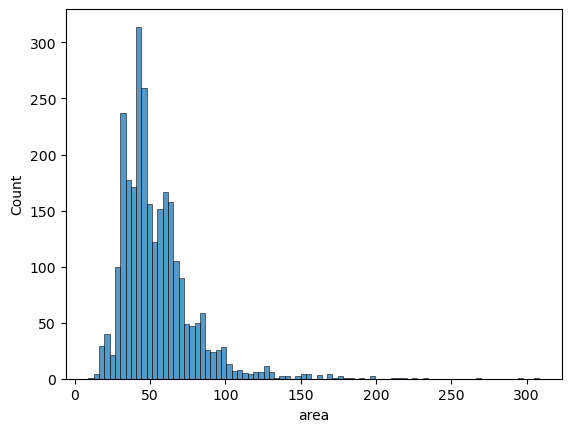

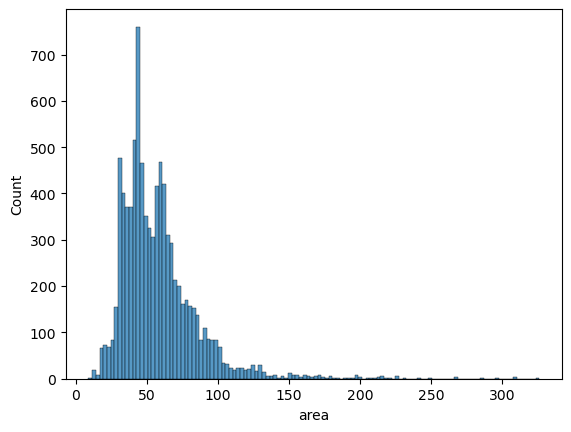

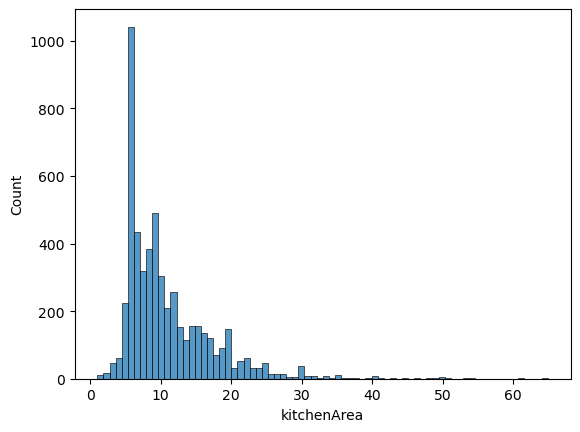

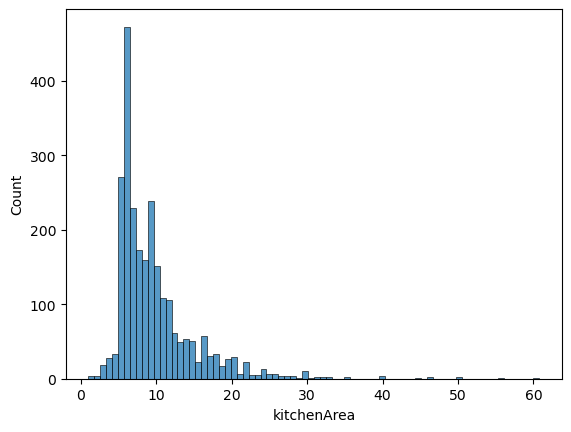

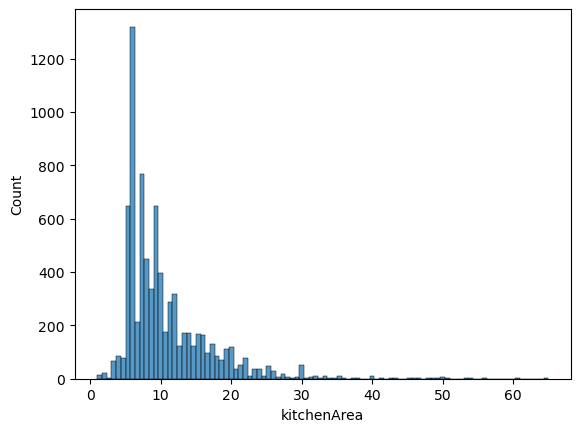

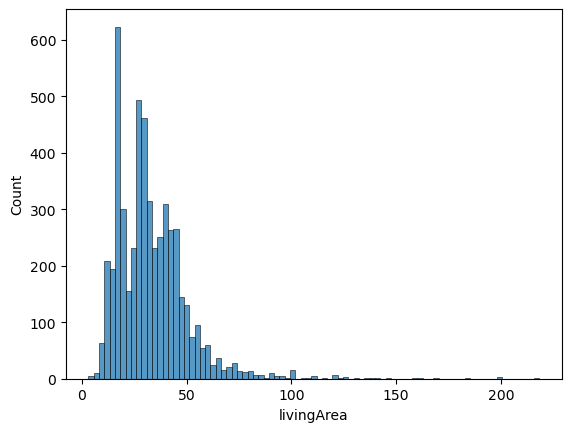

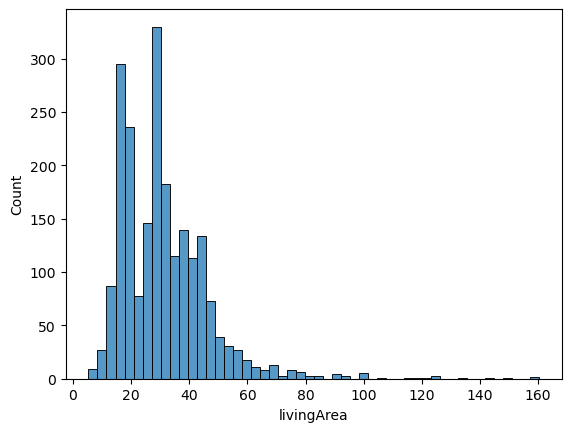

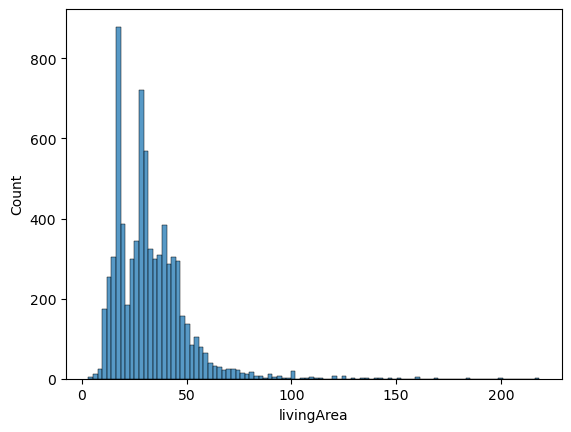

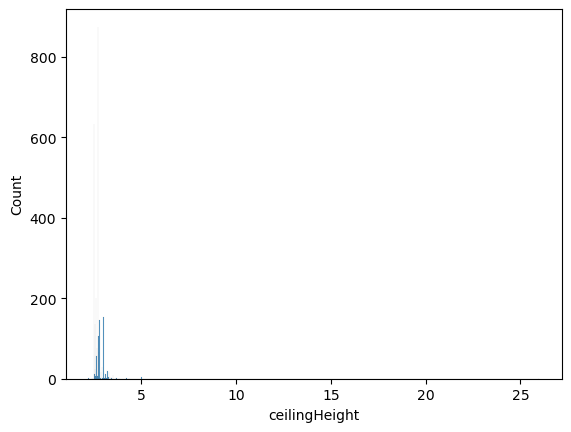

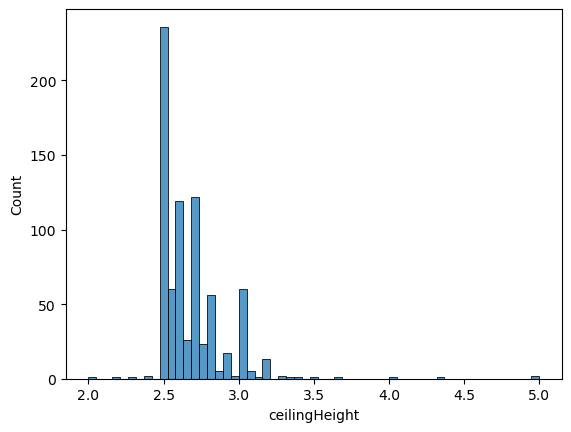

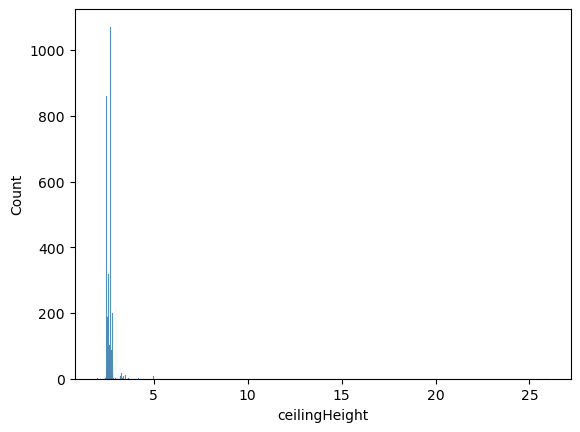

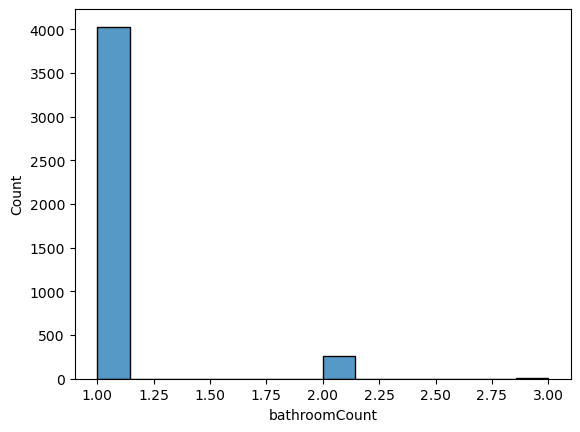

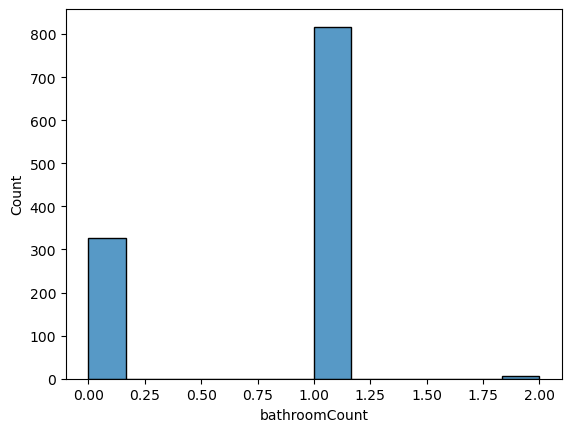

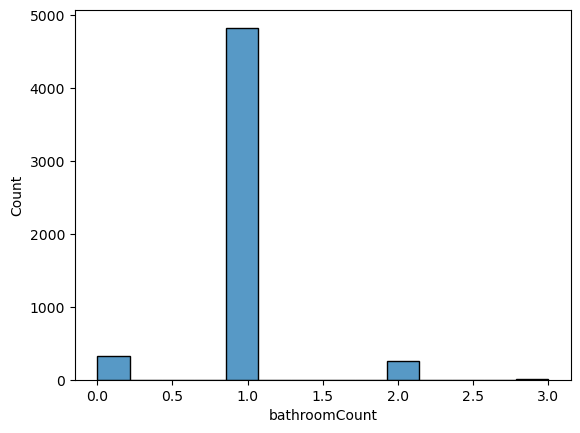

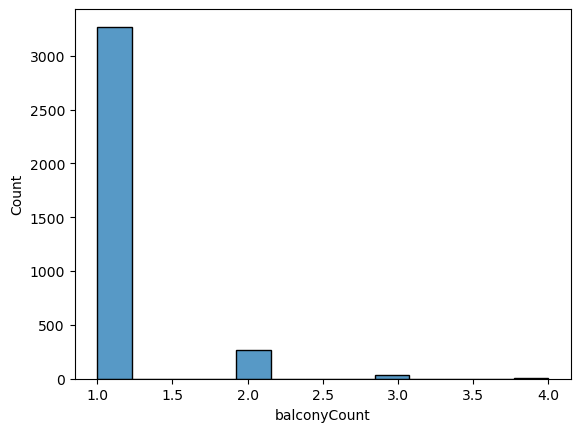

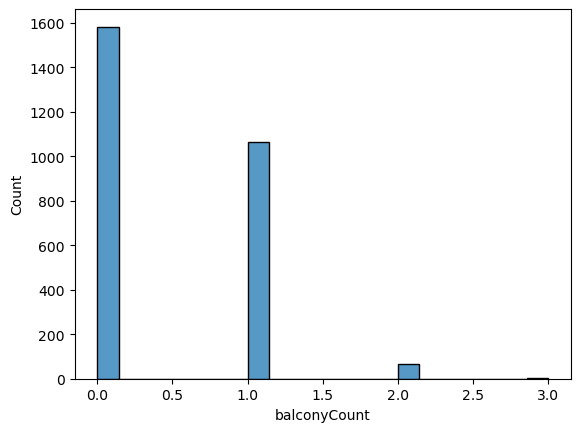

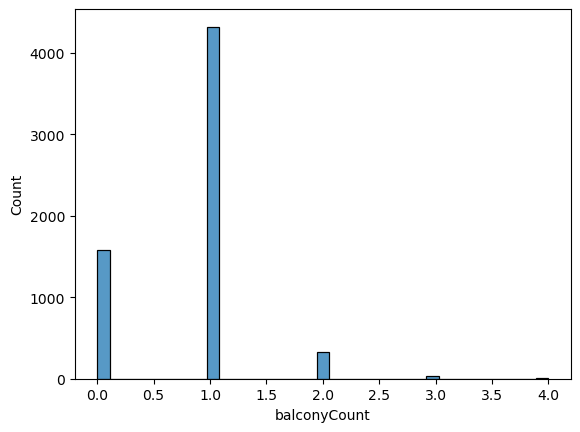

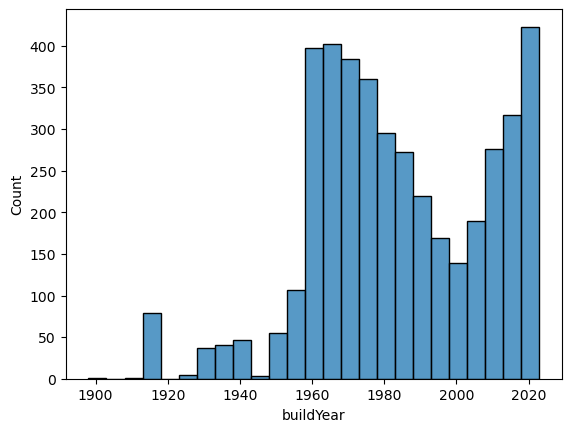

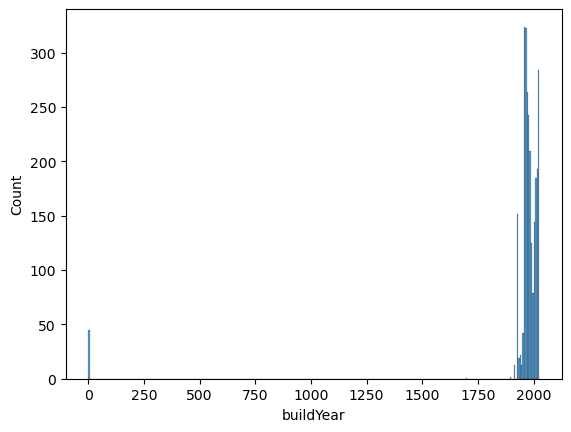

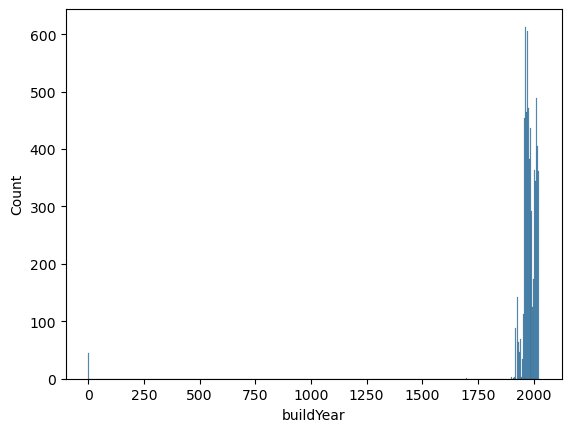

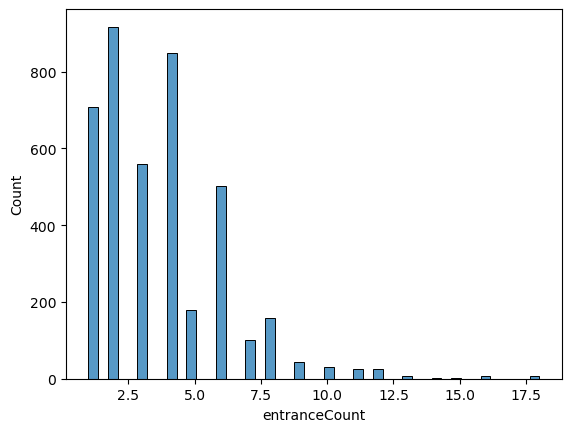

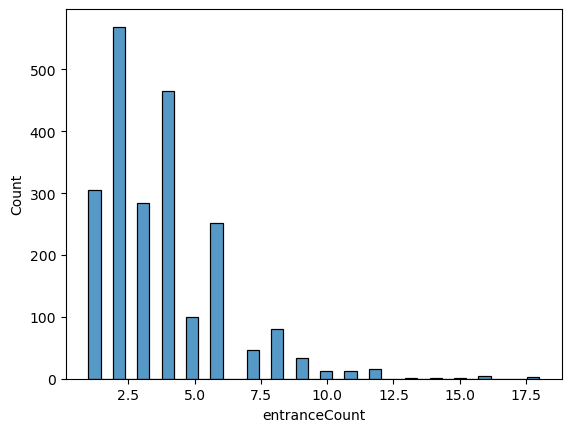

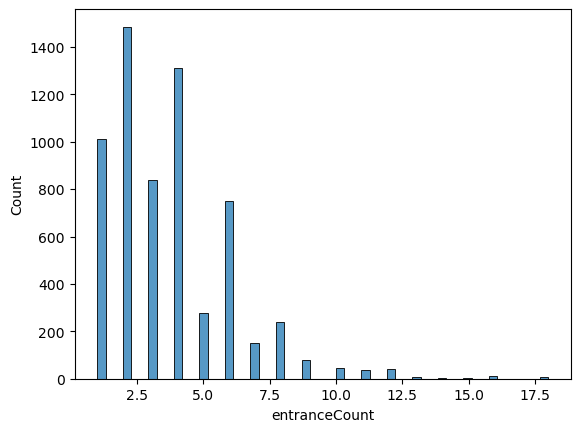

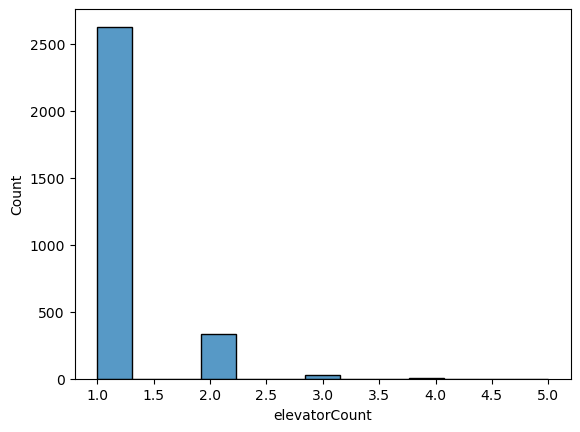

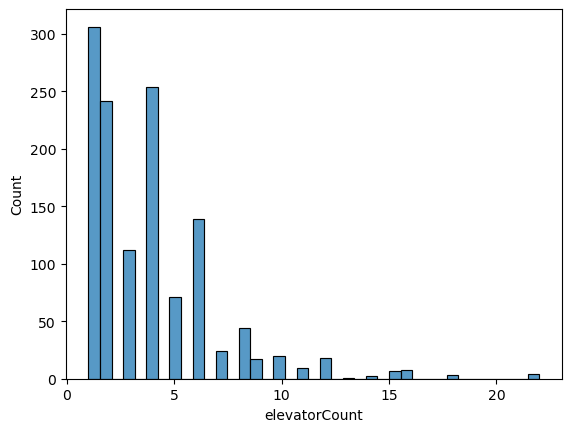

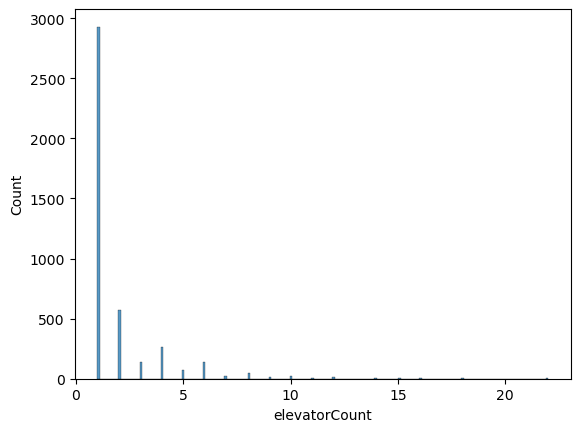

<Figure size 640x480 with 0 Axes>

In [162]:
for col in num_cols_cf:
    sns.histplot(data = merge_cian, x = col)
    plt.figure()
    sns.histplot(data = merge_domclick, x = col)
    plt.figure()
    sns.histplot(data = df_combined, x = col)
    plt.figure()

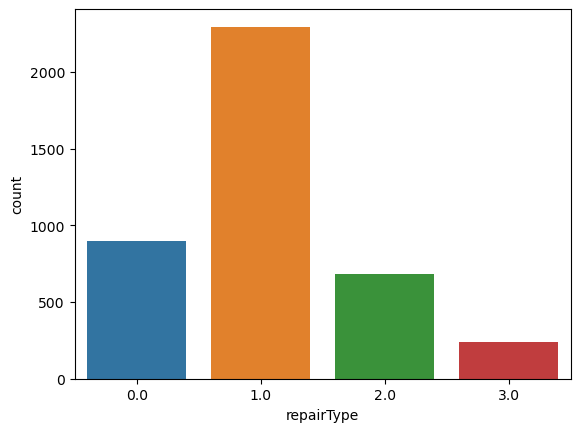

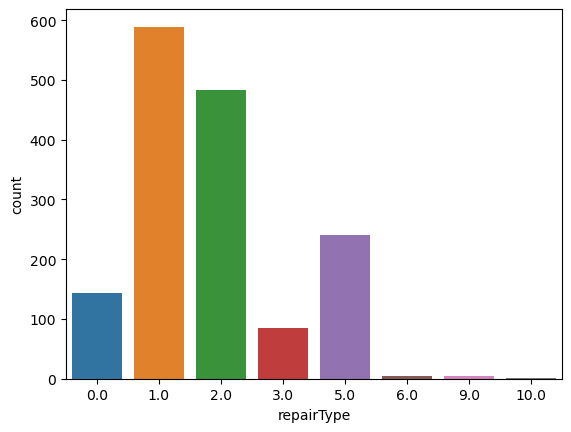

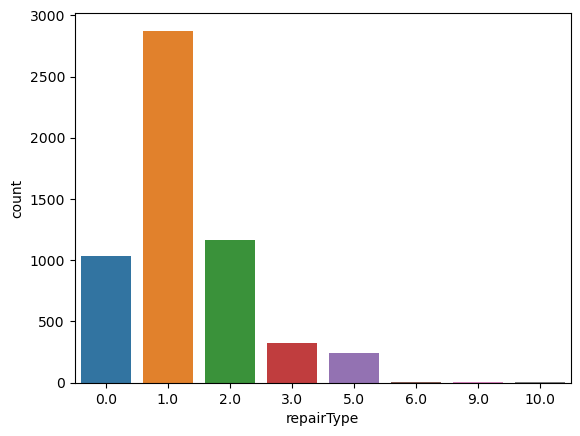

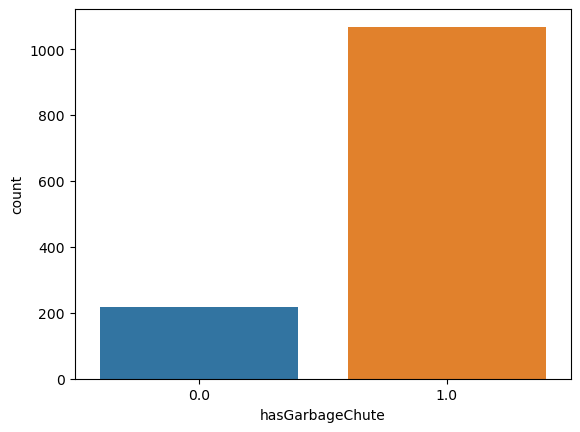

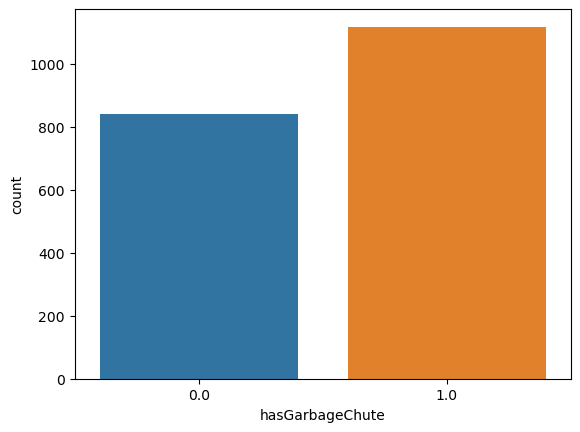

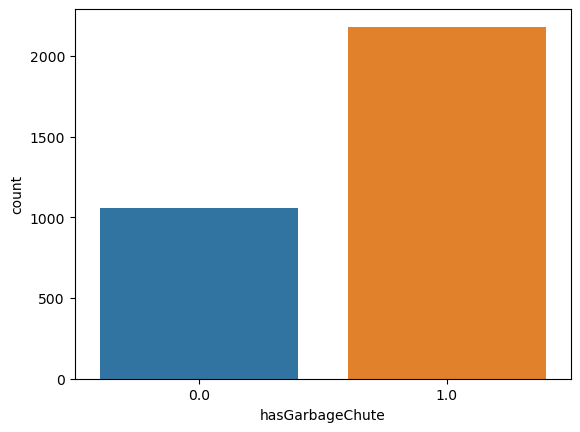

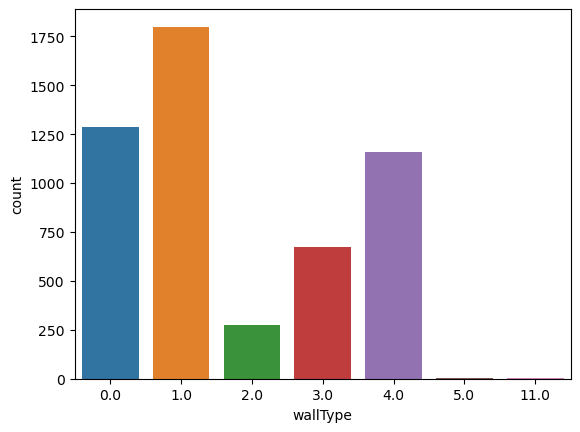

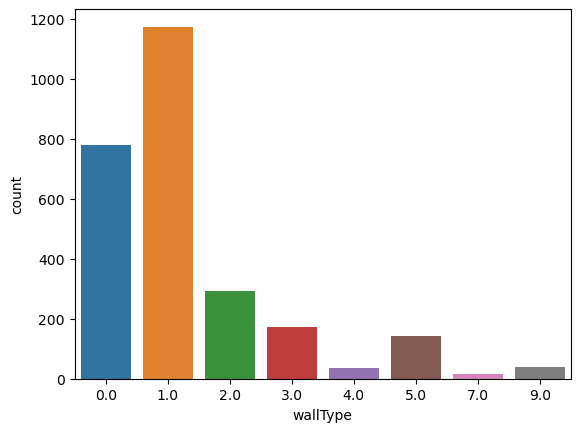

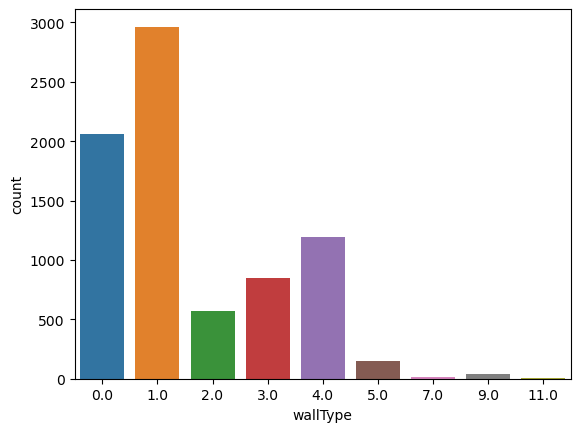

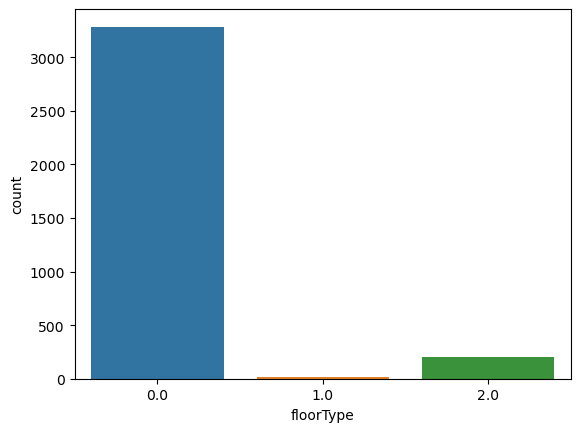

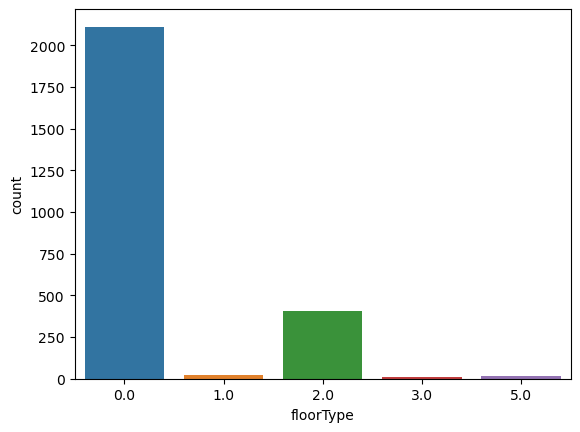

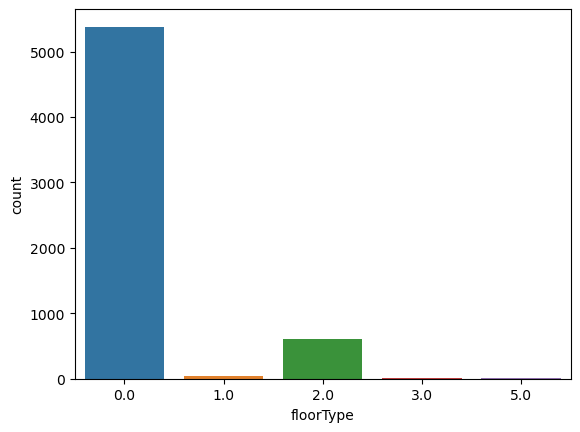

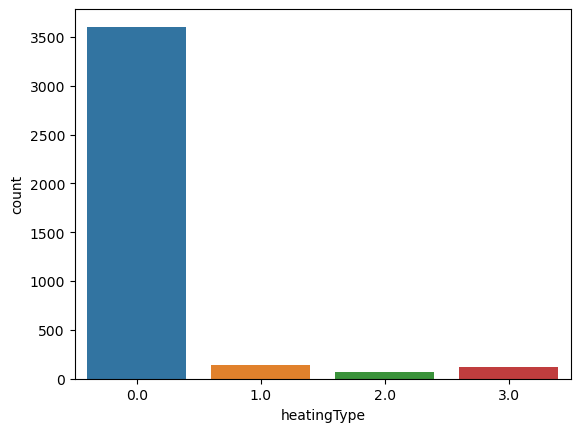

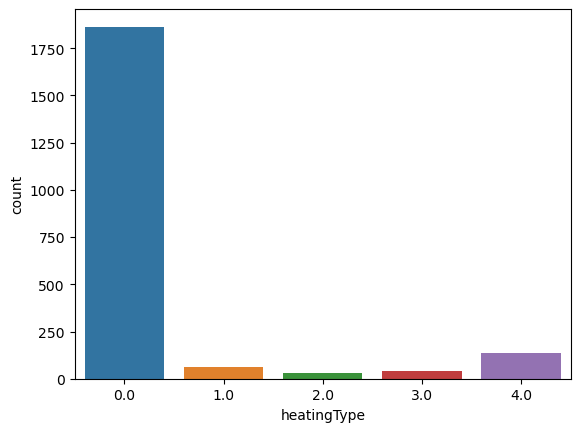

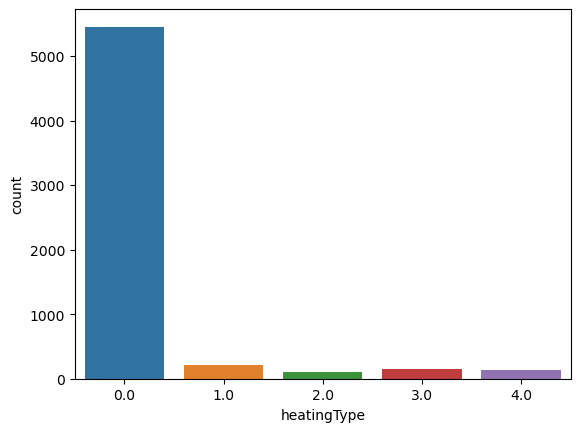

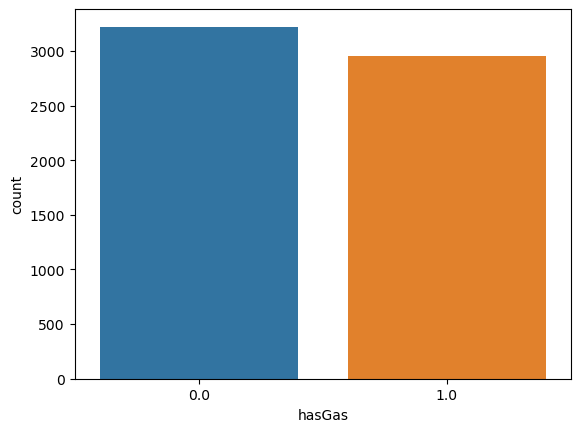

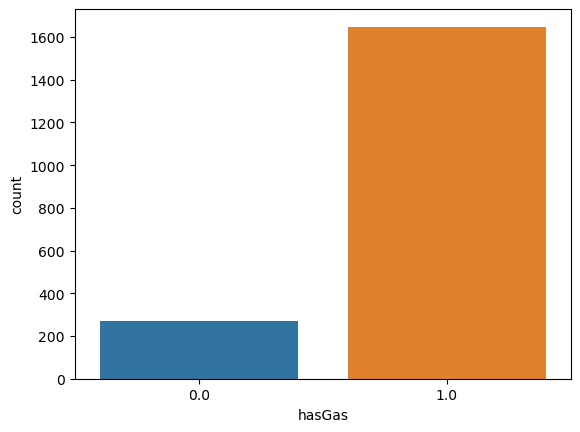

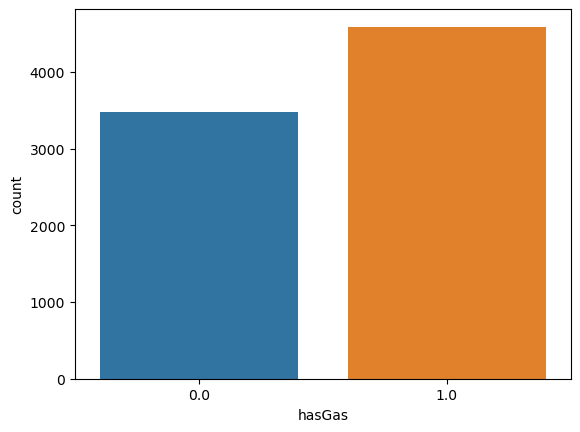

<Figure size 640x480 with 0 Axes>

In [163]:
for col in cat_cols_cf:
    sns.countplot(data = merge_cian, x = col)
    plt.figure()
    sns.countplot(data = merge_domclick, x = col)
    plt.figure()
    sns.countplot(data = df_combined, x = col)
    plt.figure()

# Заполнение пропусков

In [164]:
from miceforest import ImputationKernel

domclick_mice_kernel = ImputationKernel(data = df_domclick_prepared, save_all_iterations = True, random_state = 123)
domclick_mice_kernel.mice(10)
domclick_imputation = domclick_mice_kernel.complete_data()

In [165]:
domclick_imputation.info()
domclick_imputation.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2715 entries, 0 to 2714
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       2715 non-null   float64
 1   longitude                      2715 non-null   float64
 2   price                          2715 non-null   int64  
 3   house_floors                   2715 non-null   int64  
 4   house_buildYear                2715 non-null   float64
 5   house_ceilingHeight            2715 non-null   float64
 6   house_hasGarbageDisposer       2715 non-null   float64
 7   house_liftsFreight             2715 non-null   float64
 8   house_liftsPassenger           2715 non-null   float64
 9   house_wallType                 2715 non-null   float64
 10  house_areaNonResidential       2715 non-null   float64
 11  house_basementArea             2715 non-null   float64
 12  house_chuteCount               2715 non-null   f

,latitude,longitude,price,house_floors,house_buildYear,house_ceilingHeight,house_hasGarbageDisposer,house_liftsFreight,house_liftsPassenger,house_wallType,house_areaNonResidential,house_basementArea,house_chuteCount,house_coldWaterType,house_electricalEntriesCount,house_electricalType,house_elevatorsCount,house_energyEfficiency,house_entranceCount,house_fireFightingType,house_floorType,house_foundationType,house_heatingType,house_parkingSquare,house_sewerageCesspoolsVolume,house_sewerageType,house_ventilationType,objectInfo_rooms,objectInfo_area,objectInfo_kitchenArea,objectInfo_livingArea,objectInfo_floor,objectInfo_connectedBathrooms,objectInfo_separatedBathrooms,objectInfo_balconies,objectInfo_hasGas,objectInfo_renovation
0,56.21791,43.86234,5799000,17,2014.00000,2.60000,0.00000,1.00000,2.00000,0.00000,0.00000,576.20000,2.00000,0.00000,2.00000,1.00000,2.00000,2.00000,1.00000,0.00000,0.00000,4.00000,0.00000,648.20000,0.00000,1.00000,2.00000,2,39.60000,9.20000,21.50000,13,1.00000,0.00000,1,0.00000,1.00000
1,56.23226,43.82180,4400000,9,1984.00000,2.50000,1.00000,0.00000,0.00000,1.00000,52.40000,1179.60000,5.00000,0.00000,2.00000,1.00000,5.00000,6.00000,5.00000,1.00000,0.00000,2.00000,0.00000,0.00000,0.00000,1.00000,2.00000,1,34.50000,8.00000,18.70000,5,1.00000,1.00000,0,1.00000,5.00000
2,56.31243,44.00406,13900000,18,2023.00000,2.70000,1.00000,1.00000,1.00000,4.00000,19.40000,487.40000,1.00000,0.00000,2.00000,1.00000,1.00000,4.00000,1.00000,0.00000,0.00000,4.00000,3.00000,120.00000,0.00000,1.00000,2.00000,2,70.30000,10.40000,43.00000,3,0.00000,1.00000,0,0.00000,0.00000
3,56.30530,44.07768,10100000,9,2001.00000,2.80000,1.00000,0.00000,1.00000,3.00000,248.00000,538.40000,2.00000,0.00000,2.00000,1.00000,2.00000,6.00000,2.00000,1.00000,0.00000,5.00000,0.00000,0.00000,0.00000,1.00000,0.00000,2,75.00000,10.70000,39.00000,9,0.00000,1.00000,1,1.00000,2.00000
4,56.30937,44.03276,16500000,10,2014.00000,3.00000,1.00000,1.00000,1.00000,1.00000,2992.50000,4000.00000,10.00000,0.00000,5.00000,1.00000,12.00000,0.00000,10.00000,1.00000,0.00000,3.00000,0.00000,216.00000,0.00000,1.00000,1.00000,3,97.70000,17.10000,50.30000,4,0.00000,1.00000,2,0.00000,2.00000


In [166]:
cian_mice_kernel = ImputationKernel(data = df_cian_prepared, save_all_iterations = True, random_state = 123)
cian_mice_kernel.mice(10)
cian_imputation = cian_mice_kernel.complete_data()

In [167]:
cian_imputation.info()
cian_imputation.head()

<class 'pandas.core.frame.DataFrame'>
Index: 6176 entries, 3 to 9222
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                6176 non-null   int64  
 1   price_for_metr       6176 non-null   int64  
 2   floor_object         6176 non-null   int64  
 3   total_floors         6176 non-null   int64  
 4   type_of_home         6176 non-null   float64
 5   square_home          6176 non-null   float64
 6   live_square          6176 non-null   float64
 7   kitchen_square       6176 non-null   float64
 8   height_ceiling       6176 non-null   float64
 9   bathroom             6176 non-null   float64
 10  balcony              6176 non-null   float64
 11  repair               6176 non-null   float64
 12  yer_home             6176 non-null   float64
 13  garbage_chute        6176 non-null   float64
 14  type_home            6176 non-null   float64
 15  type_of_overlap      6176 non-null   float6

,price,price_for_metr,floor_object,total_floors,type_of_home,square_home,live_square,kitchen_square,height_ceiling,bathroom,balcony,repair,yer_home,garbage_chute,type_home,type_of_overlap,entrances,heating,gas_supply,finishing,number_of_elevators,room_count
3,1500000,96774,-2,25,3.00000,15.50000,9.20000,4.60000,2.70000,1.00000,1.00000,1.00000,2010.00000,0.00000,4.00000,0.00000,1.00000,0.00000,0.00000,1.00000,2.00000,1
4,1500000,48387,2,2,0.00000,31.00000,16.00000,10.00000,2.70000,1.00000,1.00000,1.00000,1910.00000,1.00000,2.00000,2.00000,2.00000,0.00000,0.00000,2.00000,1.00000,1
5,1600000,28881,2,2,0.00000,55.40000,30.80000,7.00000,2.50000,1.00000,1.00000,1.00000,1983.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,5.00000,2.00000,2
6,1400000,126126,1,5,1.00000,11.10000,3.10000,3.00000,2.50000,1.00000,1.00000,2.00000,1971.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,3.00000,1.00000,0
8,1600000,30418,2,2,0.00000,52.60000,39.00000,7.30000,2.70000,1.00000,1.00000,1.00000,1952.00000,0.00000,0.00000,2.00000,2.00000,0.00000,1.00000,5.00000,2.00000,3


In [168]:
combined_mice_kernel = ImputationKernel(data = df_combined, save_all_iterations = True, random_state = 123)
combined_mice_kernel.mice(10)
combined_imputation = combined_mice_kernel.complete_data()

In [169]:
combined_imputation.info()
combined_imputation.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8863 entries, 0 to 8862
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            8863 non-null   int64  
 1   room_count       8863 non-null   int64  
 2   floor            8863 non-null   int64  
 3   totalFloors      8863 non-null   int64  
 4   area             8863 non-null   float64
 5   kitchenArea      8863 non-null   float64
 6   livingArea       8863 non-null   float64
 7   ceilingHeight    8863 non-null   float64
 8   bathroomCount    8863 non-null   float64
 9   balconyCount     8863 non-null   float64
 10  repairType       8863 non-null   float64
 11  buildYear        8863 non-null   float64
 12  hasGarbageChute  8863 non-null   float64
 13  wallType         8863 non-null   float64
 14  floorType        8863 non-null   float64
 15  entranceCount    8863 non-null   float64
 16  heatingType      8863 non-null   float64
 17  hasGas        

,price,room_count,floor,totalFloors,area,kitchenArea,livingArea,ceilingHeight,bathroomCount,balconyCount,repairType,buildYear,hasGarbageChute,wallType,floorType,entranceCount,heatingType,hasGas,elevatorCount
0,5799000,2,13,17,39.60000,9.00000,22.00000,2.60000,0.00000,1.00000,1.00000,2014.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,2.00000
1,4400000,1,5,9,34.50000,8.00000,18.70000,2.50000,1.00000,0.00000,2.00000,1984.00000,1.00000,1.00000,0.00000,5.00000,0.00000,1.00000,5.00000
2,13900000,2,3,18,70.30000,10.40000,43.00000,2.70000,1.00000,0.00000,0.00000,2023.00000,1.00000,4.00000,0.00000,1.00000,1.00000,0.00000,2.00000
3,10100000,2,9,9,75.00000,10.70000,39.00000,2.80000,1.00000,1.00000,2.00000,2001.00000,1.00000,3.00000,0.00000,2.00000,0.00000,1.00000,2.00000
4,16500000,3,4,10,97.70000,17.10000,50.30000,3.00000,1.00000,2.00000,2.00000,2014.00000,0.00000,1.00000,0.00000,2.00000,0.00000,0.00000,1.00000


In [170]:
combined_imputation['heatingType'].unique()

array([0., 1., 3., 2., 4.])

In [171]:
combined_imputation['repairType'].unique()

array([ 1.,  2.,  0.,  3.,  5.,  9.,  6., 10.])

# Сравнение моделей машинного обучения

## Разбиение данных

In [172]:
X_domclick = domclick_imputation.drop(['price'], axis=1).values
Y_domclick = domclick_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_domclick, X_test_domclick, y_train_domclick, y_test_domclick = train_test_split(X_domclick, Y_domclick, test_size=test_size, random_state=r_state)

In [173]:
X_cian = cian_imputation.drop(['price'], axis=1).values
Y_cian = cian_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_cian, X_test_cian, y_train_cian, y_test_cian = train_test_split(X_cian, Y_cian, test_size=test_size, random_state=r_state)

In [174]:
X_combined = combined_imputation.drop(['price'], axis=1).values
Y_combined = combined_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

## Линейная регрессия

In [175]:
linear_regressor_domclick = LinearRegression()
linear_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = linear_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  4681725854628.485
MAE:  1470379.9571786579
RMSE:  2163729.6168025443
R2:  0.7353641712317929


In [176]:
linear_regressor_cian = LinearRegression()
linear_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = linear_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  4533247928982.481
MAE:  1115761.7314031788
RMSE:  2129142.533740398
R2:  0.9292187449514571


In [177]:
linear_regressor_combined = LinearRegression()
linear_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = linear_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  11498045213647.182
MAE:  1932941.4162400316
RMSE:  3390876.7617899626
R2:  0.7475899566153981


## Случайный лес

In [178]:
rf_regressor_domclick = RandomForestRegressor()
rf_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = rf_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  4400404479575.415
MAE:  991366.1780854197
RMSE:  2097714.1081604552
R2:  0.7512659385605611


In [179]:
rf_regressor_cian = RandomForestRegressor()
rf_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = rf_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  1032481663174.0667
MAE:  201090.808626943
RMSE:  1016111.0486428472
R2:  0.9838790313084705


In [180]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  5503048502816.324
MAE:  1191505.1654860217
RMSE:  2345857.732859417
R2:  0.8791947078365299


## Дерево решений

In [181]:
tree_regressor_domclick = DecisionTreeRegressor()
tree_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = tree_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  7776432781781.754
MAE:  1305548.1340206186
RMSE:  2788625.608033777
R2:  0.5604350194848446


In [182]:
tree_regressor_cian = DecisionTreeRegressor()
tree_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = tree_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  1290325144294.9792
MAE:  307007.43264248705
RMSE:  1135924.7969363902
R2:  0.9798531131399224


In [183]:
tree_regressor_combined = DecisionTreeRegressor()
tree_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = tree_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  13005066046052.422
MAE:  1629958.065433213
RMSE:  3606253.7412184994
R2:  0.7145071858816894


## Метод k-ближайших соседей

In [184]:
knn_regressor_domclick = KNeighborsRegressor()
knn_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = knn_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  17325770701697.467
MAE:  2547504.0659793816
RMSE:  4162423.65716147
R2:  0.020656093274074805


In [185]:
knn_regressor_cian = KNeighborsRegressor()
knn_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = knn_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  22156633173422.695
MAE:  2809286.420207253
RMSE:  4707083.297905689
R2:  0.6540506214896019


In [186]:
knn_regressor_combined = KNeighborsRegressor()
knn_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = knn_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  9479625549799.256
MAE:  1525949.1199458484
RMSE:  3078900.0551819243
R2:  0.7918991748741238


## Перцептрон

In [187]:
nn_regressor_domclick = MLPRegressor()
nn_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = nn_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  39665397445452.55
MAE:  4898806.762106269
RMSE:  6298047.113625981
R2:  -1.2420973915036373


C:\Users\shadee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [188]:
nn_regressor_cian = MLPRegressor()
nn_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = nn_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  36592522829765.36
MAE:  3571627.283972666
RMSE:  6049175.3842788655
R2:  0.4286514367052038


C:\Users\shadee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [189]:
nn_regressor_combined = MLPRegressor()
nn_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = nn_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  45337460168991.336
MAE:  3833658.5121106
RMSE:  6733309.7484811535
R2:  0.004732537090724964


C:\Users\shadee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## XGBoost

In [190]:
xgb_regressor_domclick = XGBRegressor()
xgb_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = xgb_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  7643930715005.118
MAE:  1034709.8998527246
RMSE:  2764765.9421739695
R2:  0.5679247348897458


In [191]:
xgb_regressor_cian = XGBRegressor()
xgb_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = xgb_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  1033951192612.498
MAE:  270240.5578044041
RMSE:  1016833.9061088089
R2:  0.9838560863604746


In [192]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  5694116995284.504
MAE:  1189135.7261958483
RMSE:  2386234.899435616
R2:  0.8750002899526899


# Сохранить модель

In [193]:
combined_imputation.to_csv('datasets_18features/combined_nnovgorod_18feature.csv', index=False)

In [194]:
import pickle

rf_pkl_file = "models_18features/rf_model_nnovgorod_18features.pkl"
xgboost_pkl_file = "models_18features/xgboost_model_nnovgorod_18features.pkl"

with open(rf_pkl_file, 'wb') as file1:  
    pickle.dump(rf_regressor_combined, file1)

with open(xgboost_pkl_file, 'wb') as file2:  
    pickle.dump(xgb_regressor_combined, file2)

In [195]:
X_combined = combined_imputation.drop(['price', 'hasGarbageChute', 'balconyCount', 'elevatorCount', 'hasGas', 'bathroomCount', 
                                       'entranceCount', 'wallType', 'floorType'], axis=1).values
Y_combined = combined_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

In [196]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  5715663922276.279
MAE:  1200357.5657159511
RMSE:  2390745.474172497
R2:  0.8745272825261454


In [197]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  6251245607287.289
MAE:  1241506.932761733
RMSE:  2500249.1090463945
R2:  0.8627699625784753


In [198]:
combined_imputation10 = combined_imputation.drop(['hasGarbageChute', 'balconyCount', 'elevatorCount', 'hasGas', 'bathroomCount', 
                                       'entranceCount', 'wallType', 'floorType'], axis=1)
combined_imputation10.to_csv('datasets_10features/combined_nnovgorod_10feature.csv', index=False)

In [199]:
rf_pkl_file = "models_10features/rf_model_nnovgorod_10features.pkl"
xgboost_pkl_file = "models_10features/xgboost_model_nnovgorod_10features.pkl"

with open(rf_pkl_file, 'wb') as file1:  
    pickle.dump(rf_regressor_combined, file1)

with open(xgboost_pkl_file, 'wb') as file2:  
    pickle.dump(xgb_regressor_combined, file2)

# One Hot Encoding

In [200]:
combined_ohe = pd.get_dummies(combined_imputation, columns = cat_cols_cf)
combined_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8863 entries, 0 to 8862
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                8863 non-null   int64  
 1   room_count           8863 non-null   int64  
 2   floor                8863 non-null   int64  
 3   totalFloors          8863 non-null   int64  
 4   area                 8863 non-null   float64
 5   kitchenArea          8863 non-null   float64
 6   livingArea           8863 non-null   float64
 7   ceilingHeight        8863 non-null   float64
 8   bathroomCount        8863 non-null   float64
 9   balconyCount         8863 non-null   float64
 10  buildYear            8863 non-null   float64
 11  entranceCount        8863 non-null   float64
 12  elevatorCount        8863 non-null   float64
 13  repairType_0.0       8863 non-null   bool   
 14  repairType_1.0       8863 non-null   bool   
 15  repairType_2.0       8863 non-null   b

In [201]:
combined_ohe.to_csv('datasets_18features_ohe/combined_nnovgorod_18feature_ohe.csv', index=False)

In [202]:
X_combined = combined_ohe.drop(['price'], axis=1).values
Y_combined = combined_ohe['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

In [203]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  5206404099940.485
MAE:  1173637.2584190734
RMSE:  2281754.6099308063
R2:  0.8857067736014843


In [204]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  5409965464577.015
MAE:  1183681.211868231
RMSE:  2325933.245941726
R2:  0.8812381068042491


n_estimators = [int(x) for x in np.linspace(start = 200, stop = 500, num = 10)]

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

max_features = ['auto', 'sqrt']

min_samples_split = [2, 5, 10, 15, 20, 25, 30]

min_samples_leaf = [1, 2, 4, 6, 8, 10, 15, 20, 25, 30]
params = {'n_estimators': n_estimators,
           'max_features': max_features,
           'max_depth': max_depth,
           'min_samples_split': min_samples_split,
           'min_samples_leaf': min_samples_leaf}
model = RandomizedSearchCV(estimator = rf_regressor_combined, 
                   param_distributions = params, 
                   cv = 5, n_iter = 500)
                   
model.fit(X_train_combined, y_train_combined)

In [205]:
rf_pkl_file = "models_18features_ohe/rf_model_nnovgorod_18features_ohe.pkl"
xgboost_pkl_file = "models_18features_ohe/xgboost_model_nnovgorod_18features_ohe.pkl"

with open(rf_pkl_file, 'wb') as file1:  
    pickle.dump(rf_regressor_combined, file1)

with open(xgboost_pkl_file, 'wb') as file2:  
    pickle.dump(xgb_regressor_combined, file2)

In [206]:
cat_cols_ohe = [ele for ele in cat_cols_cf if ele not in ('hasGarbageChute', 'wallType', 'floorType', 'hasGas')]
combined_ohe_dropped = pd.get_dummies(combined_imputation10, columns = cat_cols_ohe)
combined_ohe_dropped.to_csv('datasets_10features_ohe/combined_nnovgorod_10feature_ohe.csv', index=False)
combined_ohe_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8863 entries, 0 to 8862
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            8863 non-null   int64  
 1   room_count       8863 non-null   int64  
 2   floor            8863 non-null   int64  
 3   totalFloors      8863 non-null   int64  
 4   area             8863 non-null   float64
 5   kitchenArea      8863 non-null   float64
 6   livingArea       8863 non-null   float64
 7   ceilingHeight    8863 non-null   float64
 8   buildYear        8863 non-null   float64
 9   repairType_0.0   8863 non-null   bool   
 10  repairType_1.0   8863 non-null   bool   
 11  repairType_2.0   8863 non-null   bool   
 12  repairType_3.0   8863 non-null   bool   
 13  repairType_5.0   8863 non-null   bool   
 14  repairType_6.0   8863 non-null   bool   
 15  repairType_9.0   8863 non-null   bool   
 16  repairType_10.0  8863 non-null   bool   
 17  heatingType_0.

In [207]:
X_combined = combined_ohe_dropped.drop(['price'], axis=1).values
Y_combined = combined_ohe_dropped['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

In [208]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  5636420840333.334
MAE:  1190832.065213738
RMSE:  2374114.7487712833
R2:  0.8762668608091919


In [209]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  5915839939895.11
MAE:  1216479.479636733
RMSE:  2432249.9747959934
R2:  0.8701329323254907


In [210]:
rf_pkl_file = "models_10features_ohe/rf_model_nnovgorod_10features_ohe.pkl"
xgboost_pkl_file = "models_10features_ohe/xgboost_model_nnovgorod_10features_ohe.pkl"

with open(rf_pkl_file, 'wb') as file1:  
    pickle.dump(rf_regressor_combined, file1)

with open(xgboost_pkl_file, 'wb') as file2:  
    pickle.dump(xgb_regressor_combined, file2)